# <span style="color:green"> Hydrophobicity in Sequences </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import statistics as stat
import time
from Bio.Seq import Seq

In [2]:
import gpcr_package as gpcr


>>>>>>>>>>>>>>>>> Testing dependencies...
`gpcr_package` depends on the following packages:
['ProgressBar', 'Seq', 'SeqIO', 'ceil', 'clr', 'colored', 'cprint', 'datetime', 'display', 'floor', 'go', 'it', 'kurtosis', 'norm', 'np', 'os', 'pd', 'pickle', 'plt', 'skew', 'stat', 'style']
<<<<<<<<<<<<<<<<< Dependencies test successful!


>>>>>>>>>>>>>>>>> Testing constants...
`gpcr_package` uses the following constants:
['AA', 'AA_ABBREVATIONS', 'AA_ABBRE_LONG_NAMES', 'AA_ABBRE_SHORT_NAMES', 'AA_CHARGES_PH7', 'AA_HYDRO_PHOBICITY_PH2', 'AA_HYDRO_PHOBICITY_PH7', 'AA_LONG_NAMES', 'AA_SHORT_NAMES', 'BINS_PLOT_HIST', 'COLOR_AT', 'COLOR_COLORBAR_CMAP', 'COLOR_COLORBAR_CMAP_RED_BLUE', 'COLOR_CONFI_LINE', 'COLOR_FIT_GAUSSIAN', 'COLOR_GPCR_CLASSES', 'COLOR_GPCR_CLASSES_ALL', 'COLOR_LT', 'COLOR_MEAN_LINE', 'COLOR_MEDIAN_LINE', 'COLOR_PLOT_HIST_DEFAULT', 'COLOR_PLOT_LINE', 'COLOR_PLOT_SCATTER', 'COLOR_QUANTILE_LINE', 'COLOR_SEQ_COMPARISION_LENGTH_COMPARISION', 'COLOR_SEQ_COMPARISION_LENGTH_NON_COMPARI

In [3]:
set( gpcr.GPCR_DF["class"] )

{'A', 'AD', 'B', 'C', 'F'}

In [4]:
gpcr.GPCR_DF

gene class  name  seq_len  \
0             DRD2     A  GPCR       12   
1           P2RY13     A  GPCR       12   
2            F2RL2     A  GPCR       13   
3           ADGRF2    AD  GPCR       13   
4             DRD3     A  GPCR       14   
5           ADGRG3    AD  GPCR       15   
6            HTR1F     A  GPCR       16   
7            HTR5A     A  GPCR       16   
8             DRD4     A  GPCR       16   
9            NPY5R     A  GPCR       17   
10            MC1R     A  GPCR       17   
11           HTR1D     A  GPCR       17   
12          GPR141     A  GPCR       17   
13            HRH1     A  GPCR       17   
14           HTR1E     A  GPCR       18   
15            MC2R     A  GPCR       19   
16           HTR1A     A  GPCR       19   
17           HTR1B     A  GPCR       19   
18          ADRA2C     A  GPCR       21   
19           FFAR1     A  GPCR       21   
20          ADRA2A     A  GPCR       21   
21            MC3R     A  GPCR       22   
22           CHRM4     A  GPCR       23   
23           GPR84     A  GPCR       23   
24         ADGRE4P    AD  GPCR       23   
25          ADGRG5    AD  GPCR       23   
26          ADGRL4    AD  GPCR       23   
27          ADRA2B     A  GPCR       24   
28           CHRM2     A  GPCR       24   
29            FZD7     F  GPCR       25   
30            FZD2     F  GPCR       25   
31            FZD1     F  GPCR       25   
32           P2RY6     A  GPCR       25   
33          GPR148     A  GPCR       25   
34          TAS1R1     C  GPCR       25   
35          NPBWR2     A  GPCR       26   
36           GPR55     A  GPCR       27   
37            MC4R     A  GPCR       28   
38            MC5R     A  GPCR       28   
39           ACKR1     A  GPCR       28   
40            HRH4     A  GPCR       28   
41           PTGDR     A  GPCR       28   
42            HRH3     A  GPCR       29   
43           TAAR2     A  GPCR       29   
44           GPR33     A  GPCR       30   
45           GPR35     A  GPCR       30   
46          GPR171     A  GPCR       30   
47          GPR173     A  GPCR       30   
48          P2RY10     A  GPCR       30   
49           TAAR5     A  GPCR       30   
50          NPBWR1     A  GPCR       30   
51           MCHR2     A  GPCR       31   
52           TAAR1     A  GPCR       31   
53           PRLHR     A  GPCR       31   
54            GPR6     A  GPCR       31   
55            GPR3     A  GPCR       31   
56           GPR12     A  GPCR       31   
57           OXGR1     A  GPCR       32   
58          TBXA2R     A  GPCR       32   
59          SUCNR1     A  GPCR       32   
60            GRM6     C  GPCR       32   
61          GPR146     A  GPCR       33   
62           TAAR9     A  GPCR       33   
63          ADORA1     A  GPCR       34   
64          ADGRE1    AD  GPCR       34   
65          TAS1R2     C  GPCR       34   
66           CHRM5     A  GPCR       34   
67          ADORA3     A  GPCR       34   
68           GPR27     A  GPCR       34   
69           GPR31     A  GPCR       35   
70          TAAR3P     A  GPCR       35   
71          PTGER2     A  GPCR       35   
72           GPR32     A  GPCR       36   
73           GPR85     A  GPCR       36   
74          ADGRG1    AD  GPCR       36   
75           CCRL2     A  GPCR       37   
76           GPR17     A  GPCR       38   
77           NPSR1     A  GPCR       38   
78           CHRM1     A  GPCR       39   
79          BDKRB1     A  GPCR       39   
80         CYSLTR2     A  GPCR       39   
81          OPN1LW     A  GPCR       39   
82             RHO     A  GPCR       39   
83          P2RY14     A  GPCR       39   
84            FZD4     F  GPCR       39   
85          ADGRF4    AD  GPCR       40   
86         CYSLTR1     A  GPCR       40   
87            GHSR     A  GPCR       40   
88           GPR26     A  GPCR       40   
89           ACKR4     A  GPCR       40   
90           GPR87     A  GPCR       40   
91         ADORA2B     A  GPCR       41   
92            M

In [5]:
gpcr.GPCR_DF[ gpcr.GPCR_DF["class"] == "F" ]

gene class  name  seq_len  \
29    FZD7     F  GPCR       25   
30    FZD2     F  GPCR       25   
31    FZD1     F  GPCR       25   
84    FZD4     F  GPCR       39   
203  FZD10     F  GPCR       58   
216   FZD9     F  GPCR       62   
225   FZD5     F  GPCR       64   
293   FZD8     F  GPCR       89   
334   FZD3     F  GPCR      168   
341   FZD6     F  GPCR      212   
343    SMO     F  GPCR      242   

                                                   seq  
29                           SGKTLQSWRRFYHRLSHSSKGETAV  
30                           SGKTLHSWRKFYTRLTNSRHGETTV  
31                           SGKTLNSWRKFYTRLTNSKQGETTV  
84             KTLHTWQKCSNRLVNSGKVKREKRGNGWVKPGKGSETVV  
203  TSKTLQSWQQVCSRRLKKKSRRKPASVITSGGIYKKAQHPQKTHHG...  
216  SSKTFQTWQSLCYRKIAAGRARAKACRAPGSYGRGTHCHYKAPTVV...  
225  WSGKTVESWRRFTSRCCCRPRRGHKSGGAMAAGDYPEASAALTGRT...  
293  SGKTLESWRSLCTRCCWASKGAAVGGGAGATAAGGGGGPGGGGGGG...  
334  GSKKTCFEWASFFHGRRKKEIVNESRQVLQEPDFAQSLLRDPNTPI...  
341  GSKKTCTEWAGFFKRNRKRDPISESRRVLQESCEFFLKHNSKVKHK...  
343  RRTWCRLTGQSDDEPKRIKKSKMIAKAFSKRHELLQNPGQELSFSM...

In [6]:
gpcr.GPCR_DF[ gpcr.GPCR_DF["class"] == "C" ]

gene class  name  seq_len  \
34   TAS1R1     C  GPCR       25   
60     GRM6     C  GPCR       32   
65   TAS1R2     C  GPCR       34   
99   TAS1R3     C  GPCR       42   
168    GRM3     C  GPCR       51   
178    GRM2     C  GPCR       53   
235    GRM4     C  GPCR       65   
236    GRM7     C  GPCR       65   
237    GRM8     C  GPCR       65   
283  GPRC5D     C  GPCR       85   
292  GPRC5A     C  GPCR       89   
302  GPRC6A     C  GPCR       95   
312  GABBR1     C  GPCR      107   
316  GPRC5B     C  GPCR      111   
328  GPRC5C     C  GPCR      141   
338  GABBR2     C  GPCR      200   
342    CASR     C  GPCR      216   
353    GRM1     C  GPCR      354   
358    GRM5     C  GPCR      392   
361  GPR156     C  GPCR      505   
363  GPR158     C  GPCR      551   

                                                   seq  
34                           CRPDLNSTEHFQASIQDYTRRCGST  
60                    HPEQNVQKRKRSLKATSTVAAPPKGEDAEAHK  
65                  GYFGPKCYMILFYPERNTPAYFNSMIQGYTMRRD  
99          LPRCYLLMRQPGLNTPEFFLGGGPGDAQGQNDGNTGNQGKHE  
168  QPQKNVVTHRLHLNRFSVSGTGTTYSQSSASTYVPTVCNGREVLDS...  
178  QPQKNVVSHRAPTSRFGSAAARASSSLGQGSGSQFVPTVCNGREVV...  
235  HPEQNVPKRKRSLKAVVTAATMSNKFTQKGNFRPNGEAKSELCENL...  
236  HPELNVQKRKRSFKAVVTAATMSSRLSHKPSDRPNGEAKTELCENV...  
237  HPEQNVQKRKRSFKAVVTAATMQSKLIQKGNDRPNGEVKSELCESL...  
283  ELCILYRSCRQECPLQGNACPVTAYQHSFQVENQELSRARDSDGAE...  
292  TKQRNPMDYPVEDAFCKPQLVKKSYGVENRAYSQEEITQGFEETGD...  
302  PKCYVIICKQEINTKSAFLKMIYSYSSHSVSSIALSPASLDSMSGN...  
312  PKMRRLITRGEWQSEAQDTMKTGSSTNNNEEEKSRLLEKENRELEK...  
316  HCTLLPALQENTPNYFDTSQPRMRETAFEEDVQLPRAYMENKAFSM...  
328  SQVTKSSPEQSYQGDMYPTRGVGYETILKEQKGQSMFVENKAFSMD...  
338  PKLITLRTNPDAATQNRRFQFTQNQKKEDSKTSTSVTSVNQASTSR...  
342  KPSRNTIEEVRCSTAAHAFKVAARATLRRSNVSRKRSSSLGGSTGS...  
353  KPERNVRSAFTTSDVVRMHVGDGKLPCRSNTFLNIFRRKKAGAGNA...  
358  KVYIILAKPERNVRSAFTTSTVVRMHVGDGKSSSAASRSSSLVNLW...  
361  PQLKQWKAFEEENQTIRRMAKYFSTPNKSFHTQYGEEENCHPRGEK...  
363  PKFSHSSNNPRDDIATEAYEDELDMGRSGSYLNSSINSAWSEHSLD...

# <span style="color:red"> Hydrophobicity in GPCR </span>

# <span style="color:orange"> Hydrophobicity in GPCR at ph = 2 </span>

In [7]:
gpcr.AA.HYDRO_PHOBICITY_PH2

{'R': -26,
 'K': -37,
 'H': -42,
 'D': -18,
 'E': 8,
 'N': -41,
 'Q': 8,
 'C': 52,
 'S': -7,
 'T': 13,
 'Y': 49,
 'G': 0,
 'A': 47,
 'P': -46,
 'V': 79,
 'L': 100,
 'I': 100,
 'M': 74,
 'W': 84,
 'F': 92}

In [8]:
# dict1 = gpcr.AA.AA_HYDRO_PHOBICITY_PH2
# sorted_keys = sorted(dict1, key=dict1.get)
# sorted_dict = {}
# for w in sorted_keys:
#     sorted_dict[w] = dict1[w]
# print(sorted_dict) # {1: 1, 3: 4, 2: 9}

In [9]:
min(gpcr.AA_HYDRO_PHOBICITY_PH2 + gpcr.AA_HYDRO_PHOBICITY_PH7)

-55

100% |########################################################################|


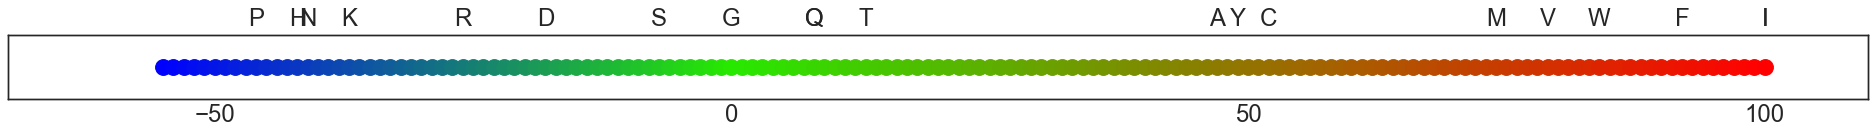

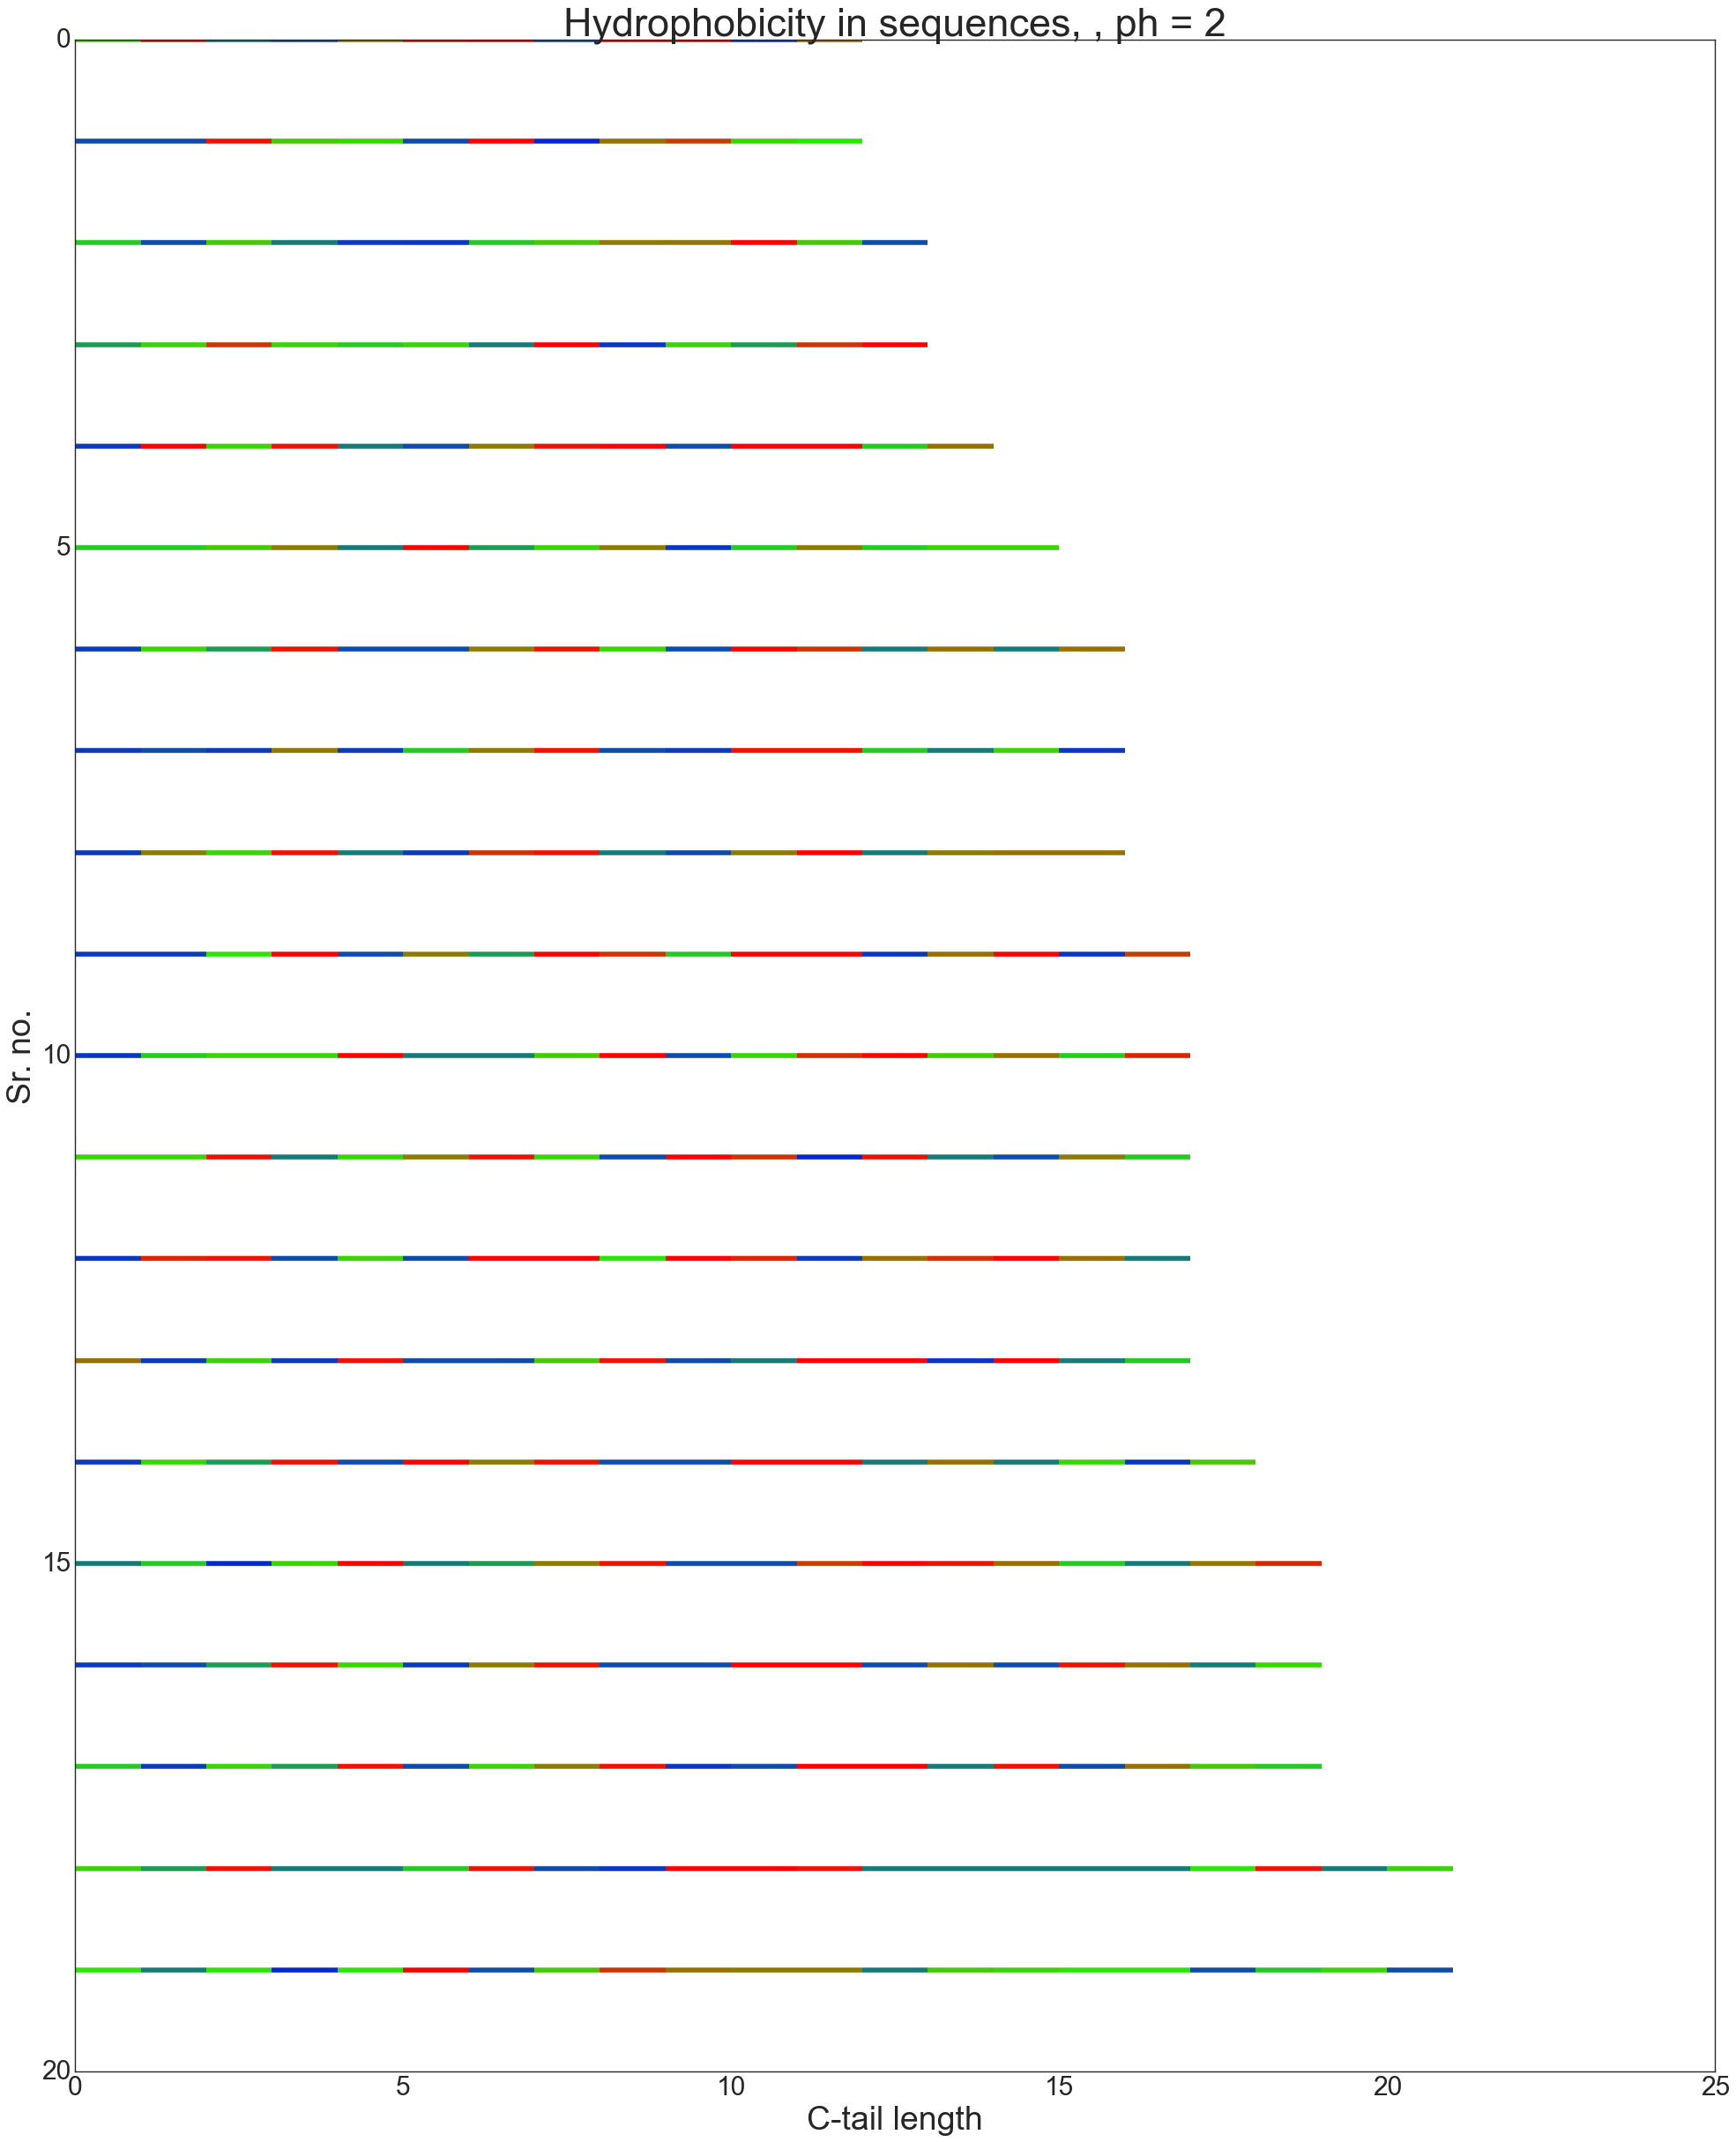

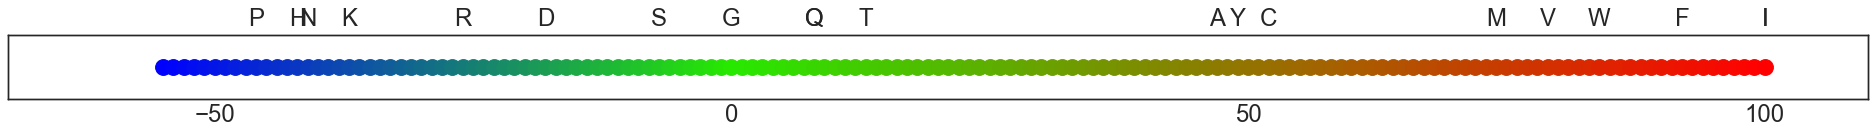

In [10]:
# display(colorbar)
_ = gpcr.line_hydrophobicity_in_sequences( sequences    = gpcr.GPCR_DF[0:20]["seq"],
                                           scale_factor = 0.45,
                                           figsize      = (30, 36),
                                           normalized   = False,
                                           savefig      = False,
                                           title_add    = ", ph = 2"
                                         ) 

### All tails

100% |########################################################################|


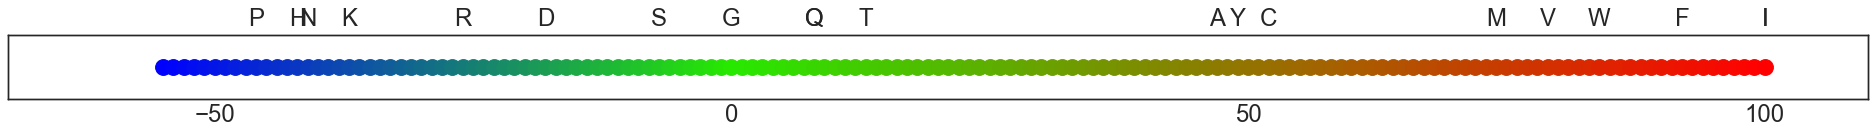

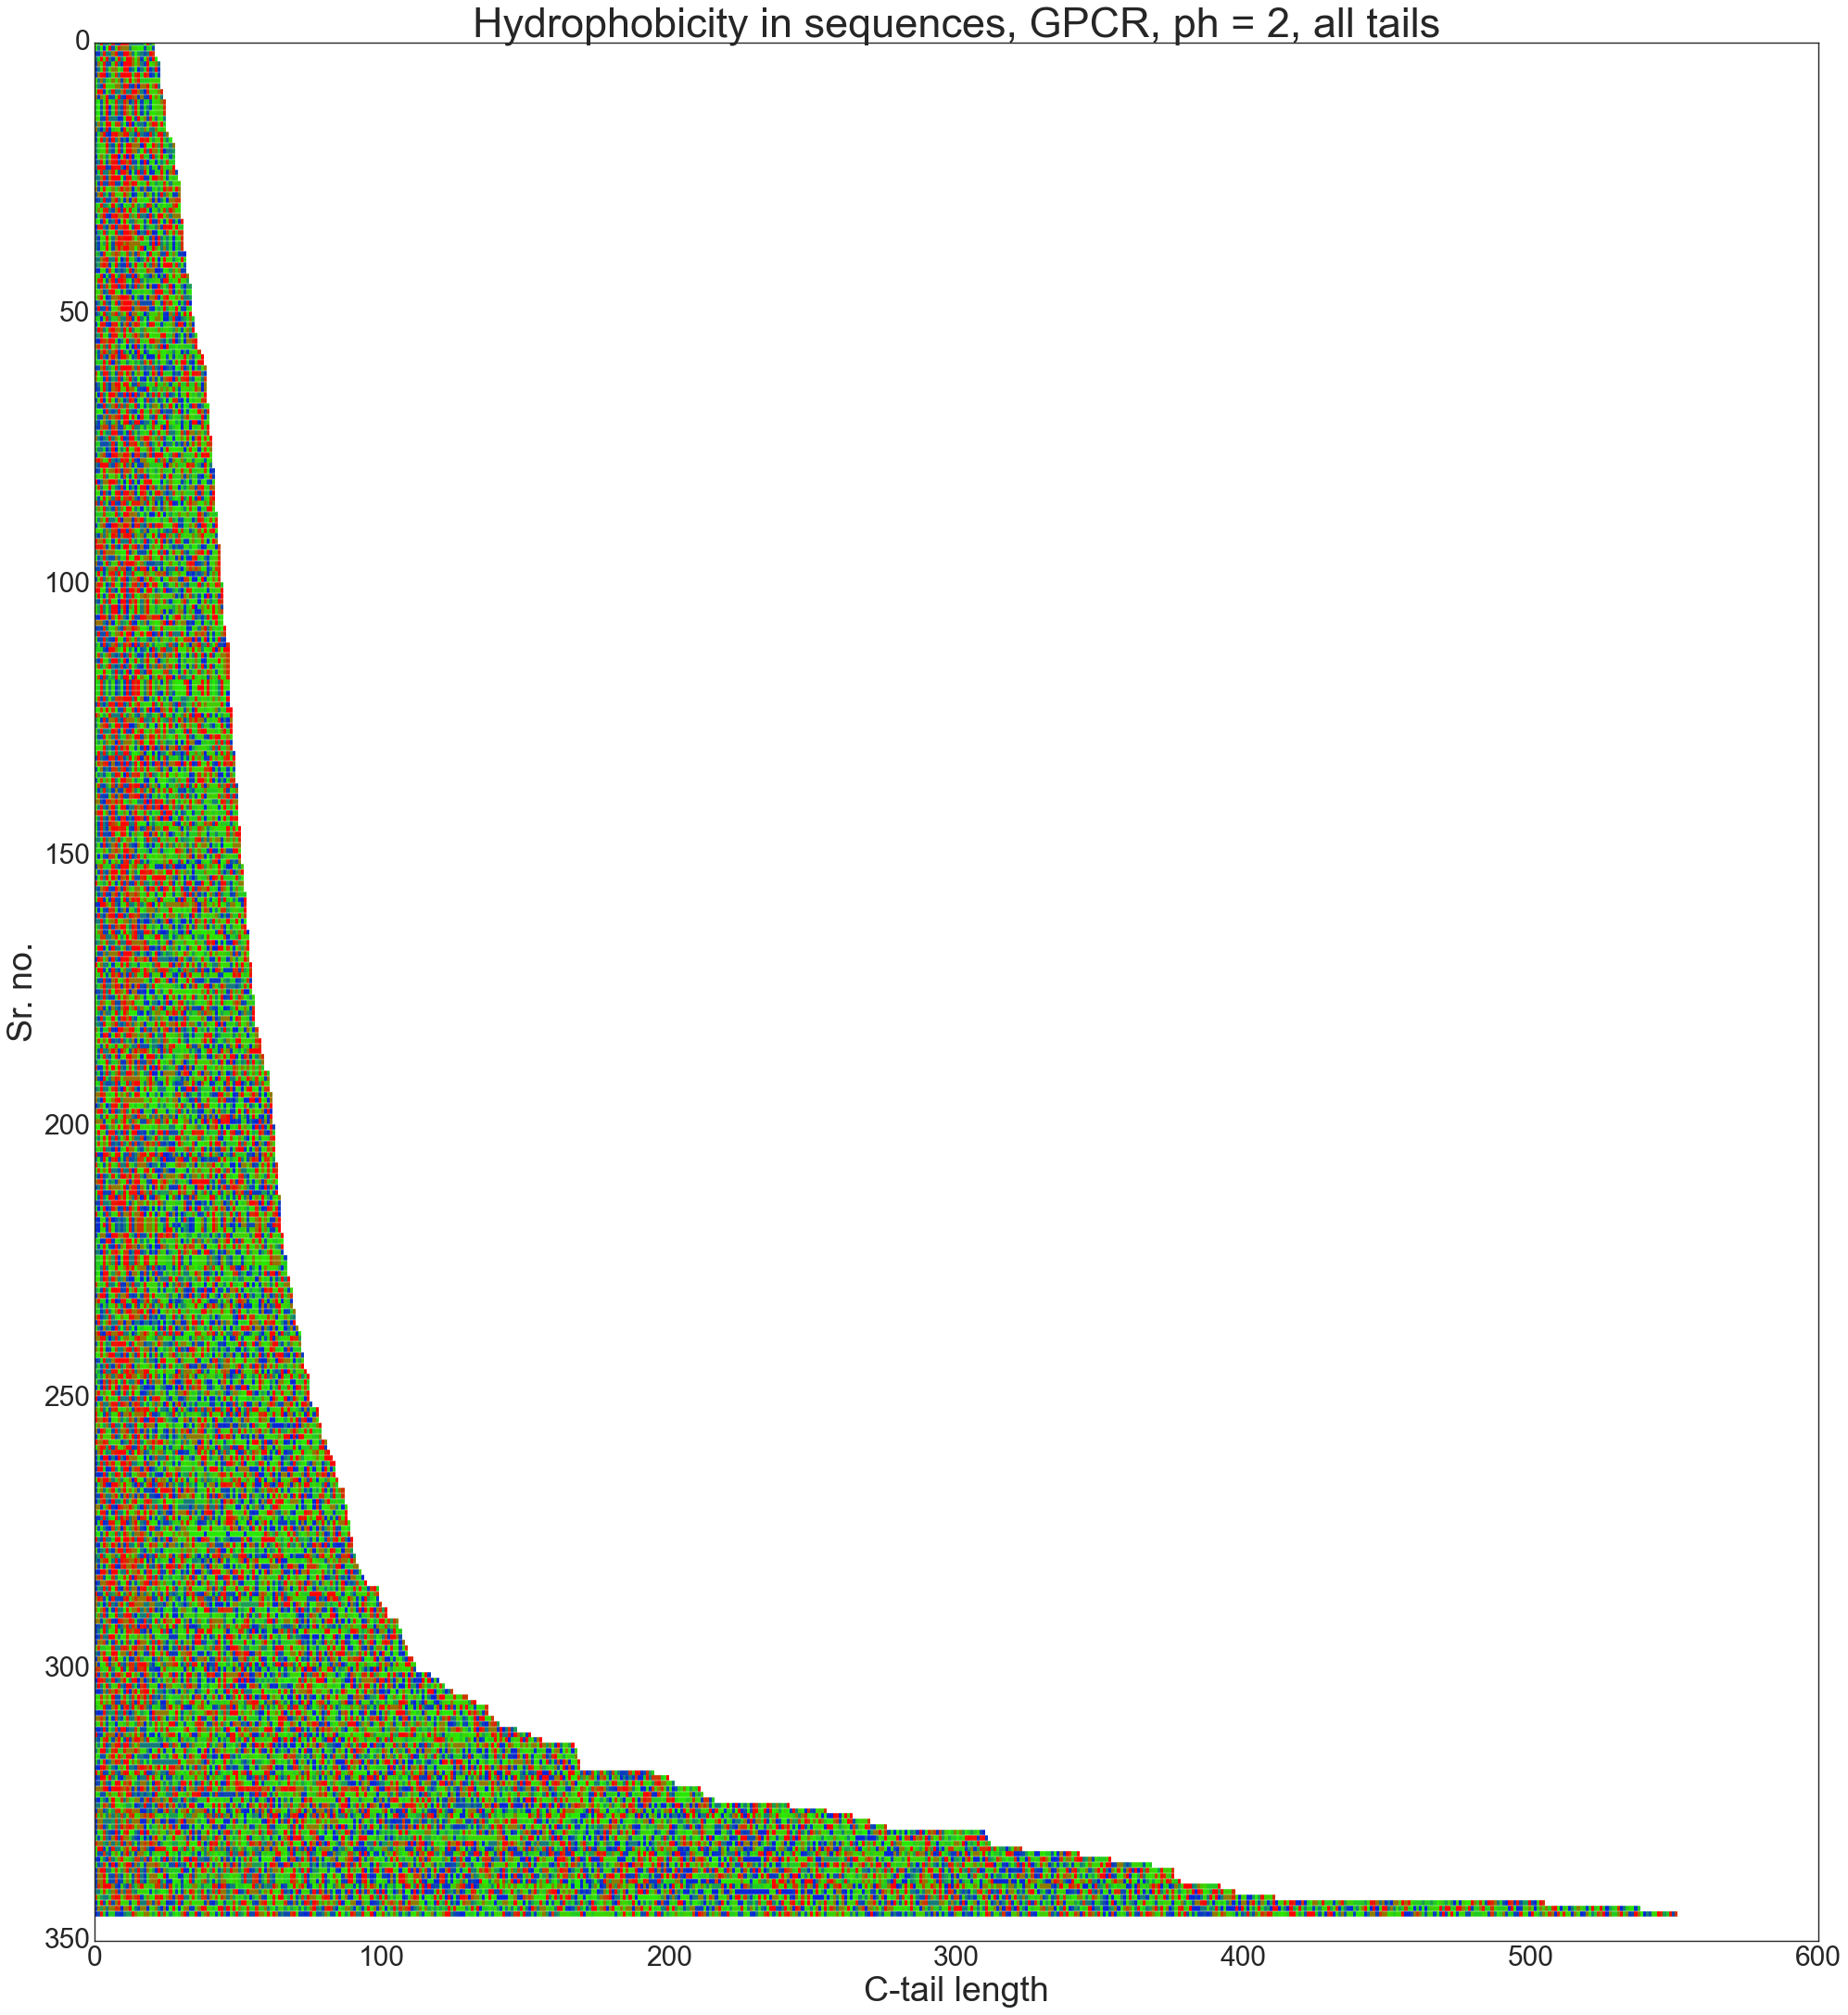

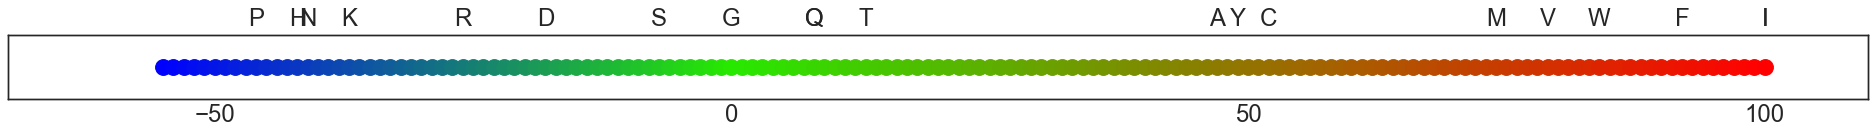

In [11]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           scale_factor = 0.45,
                                           figsize      = (30, 32),
                                           savefig      = False,
                                           title_add    = ", ph = 2, all tails"
                                         ) 

### Long tails

100% |########################################################################|


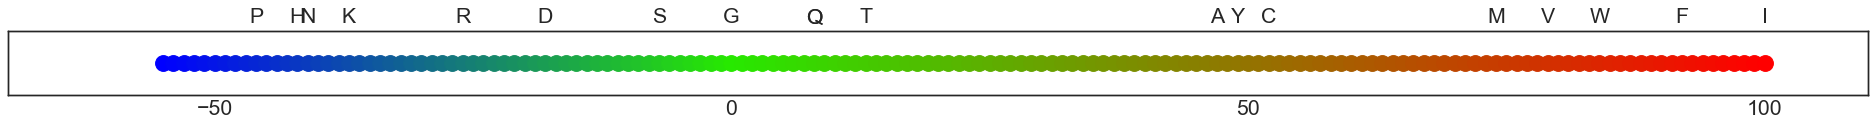

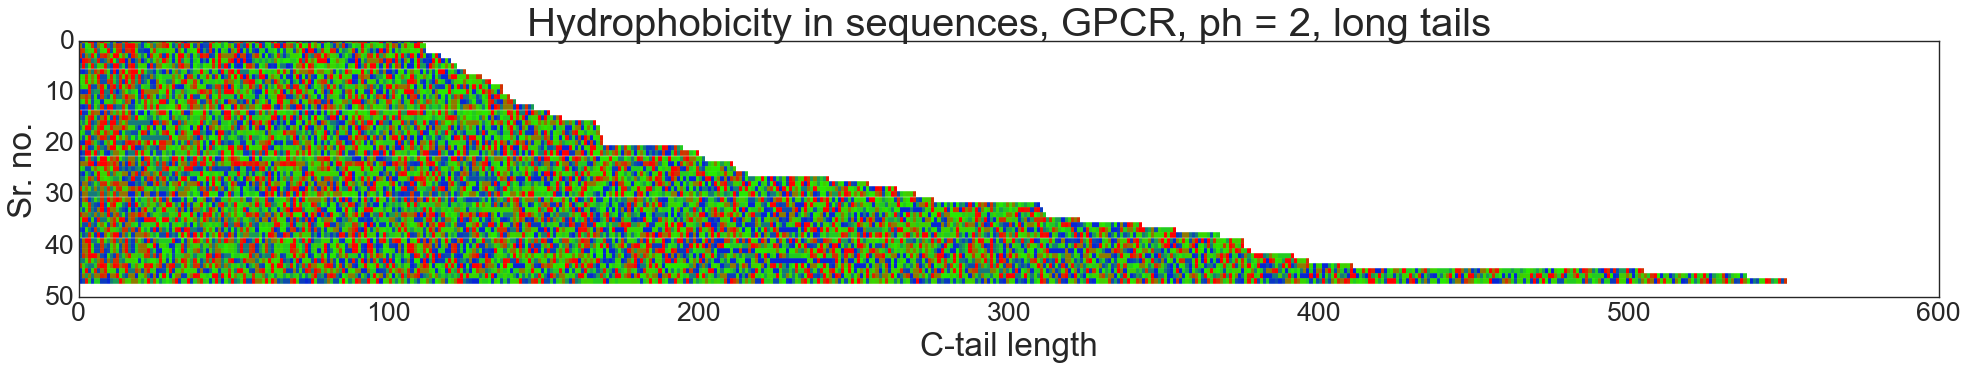

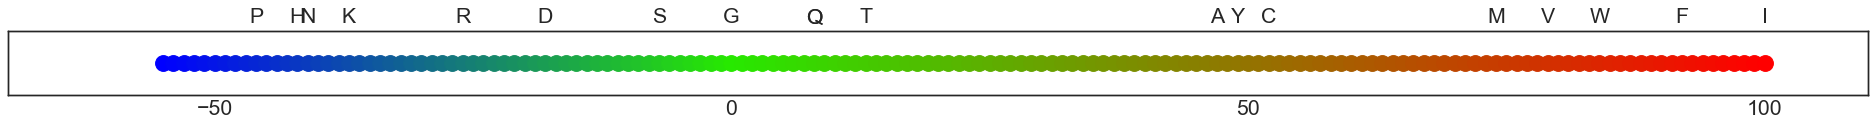

In [12]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           scale_factor = 3,
                                           figsize      = (30, 4),
                                           # normalized   = False,
                                           savefig      = False,
                                           threshold_len_min   = 110,
                                           # threshold_len_max   = None,
                                           title_add    = ", ph = 2, long tails"
                                         ) 

### Short tails

100% |########################################################################|


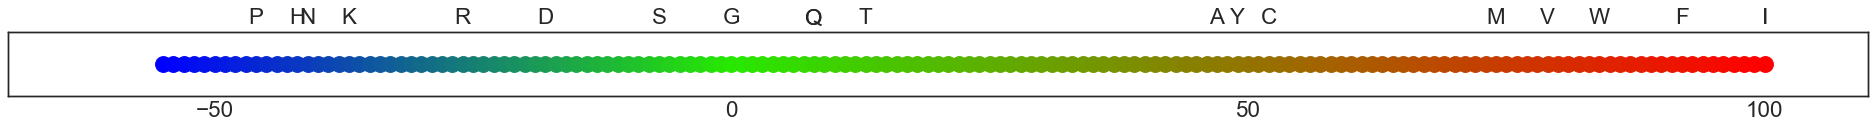

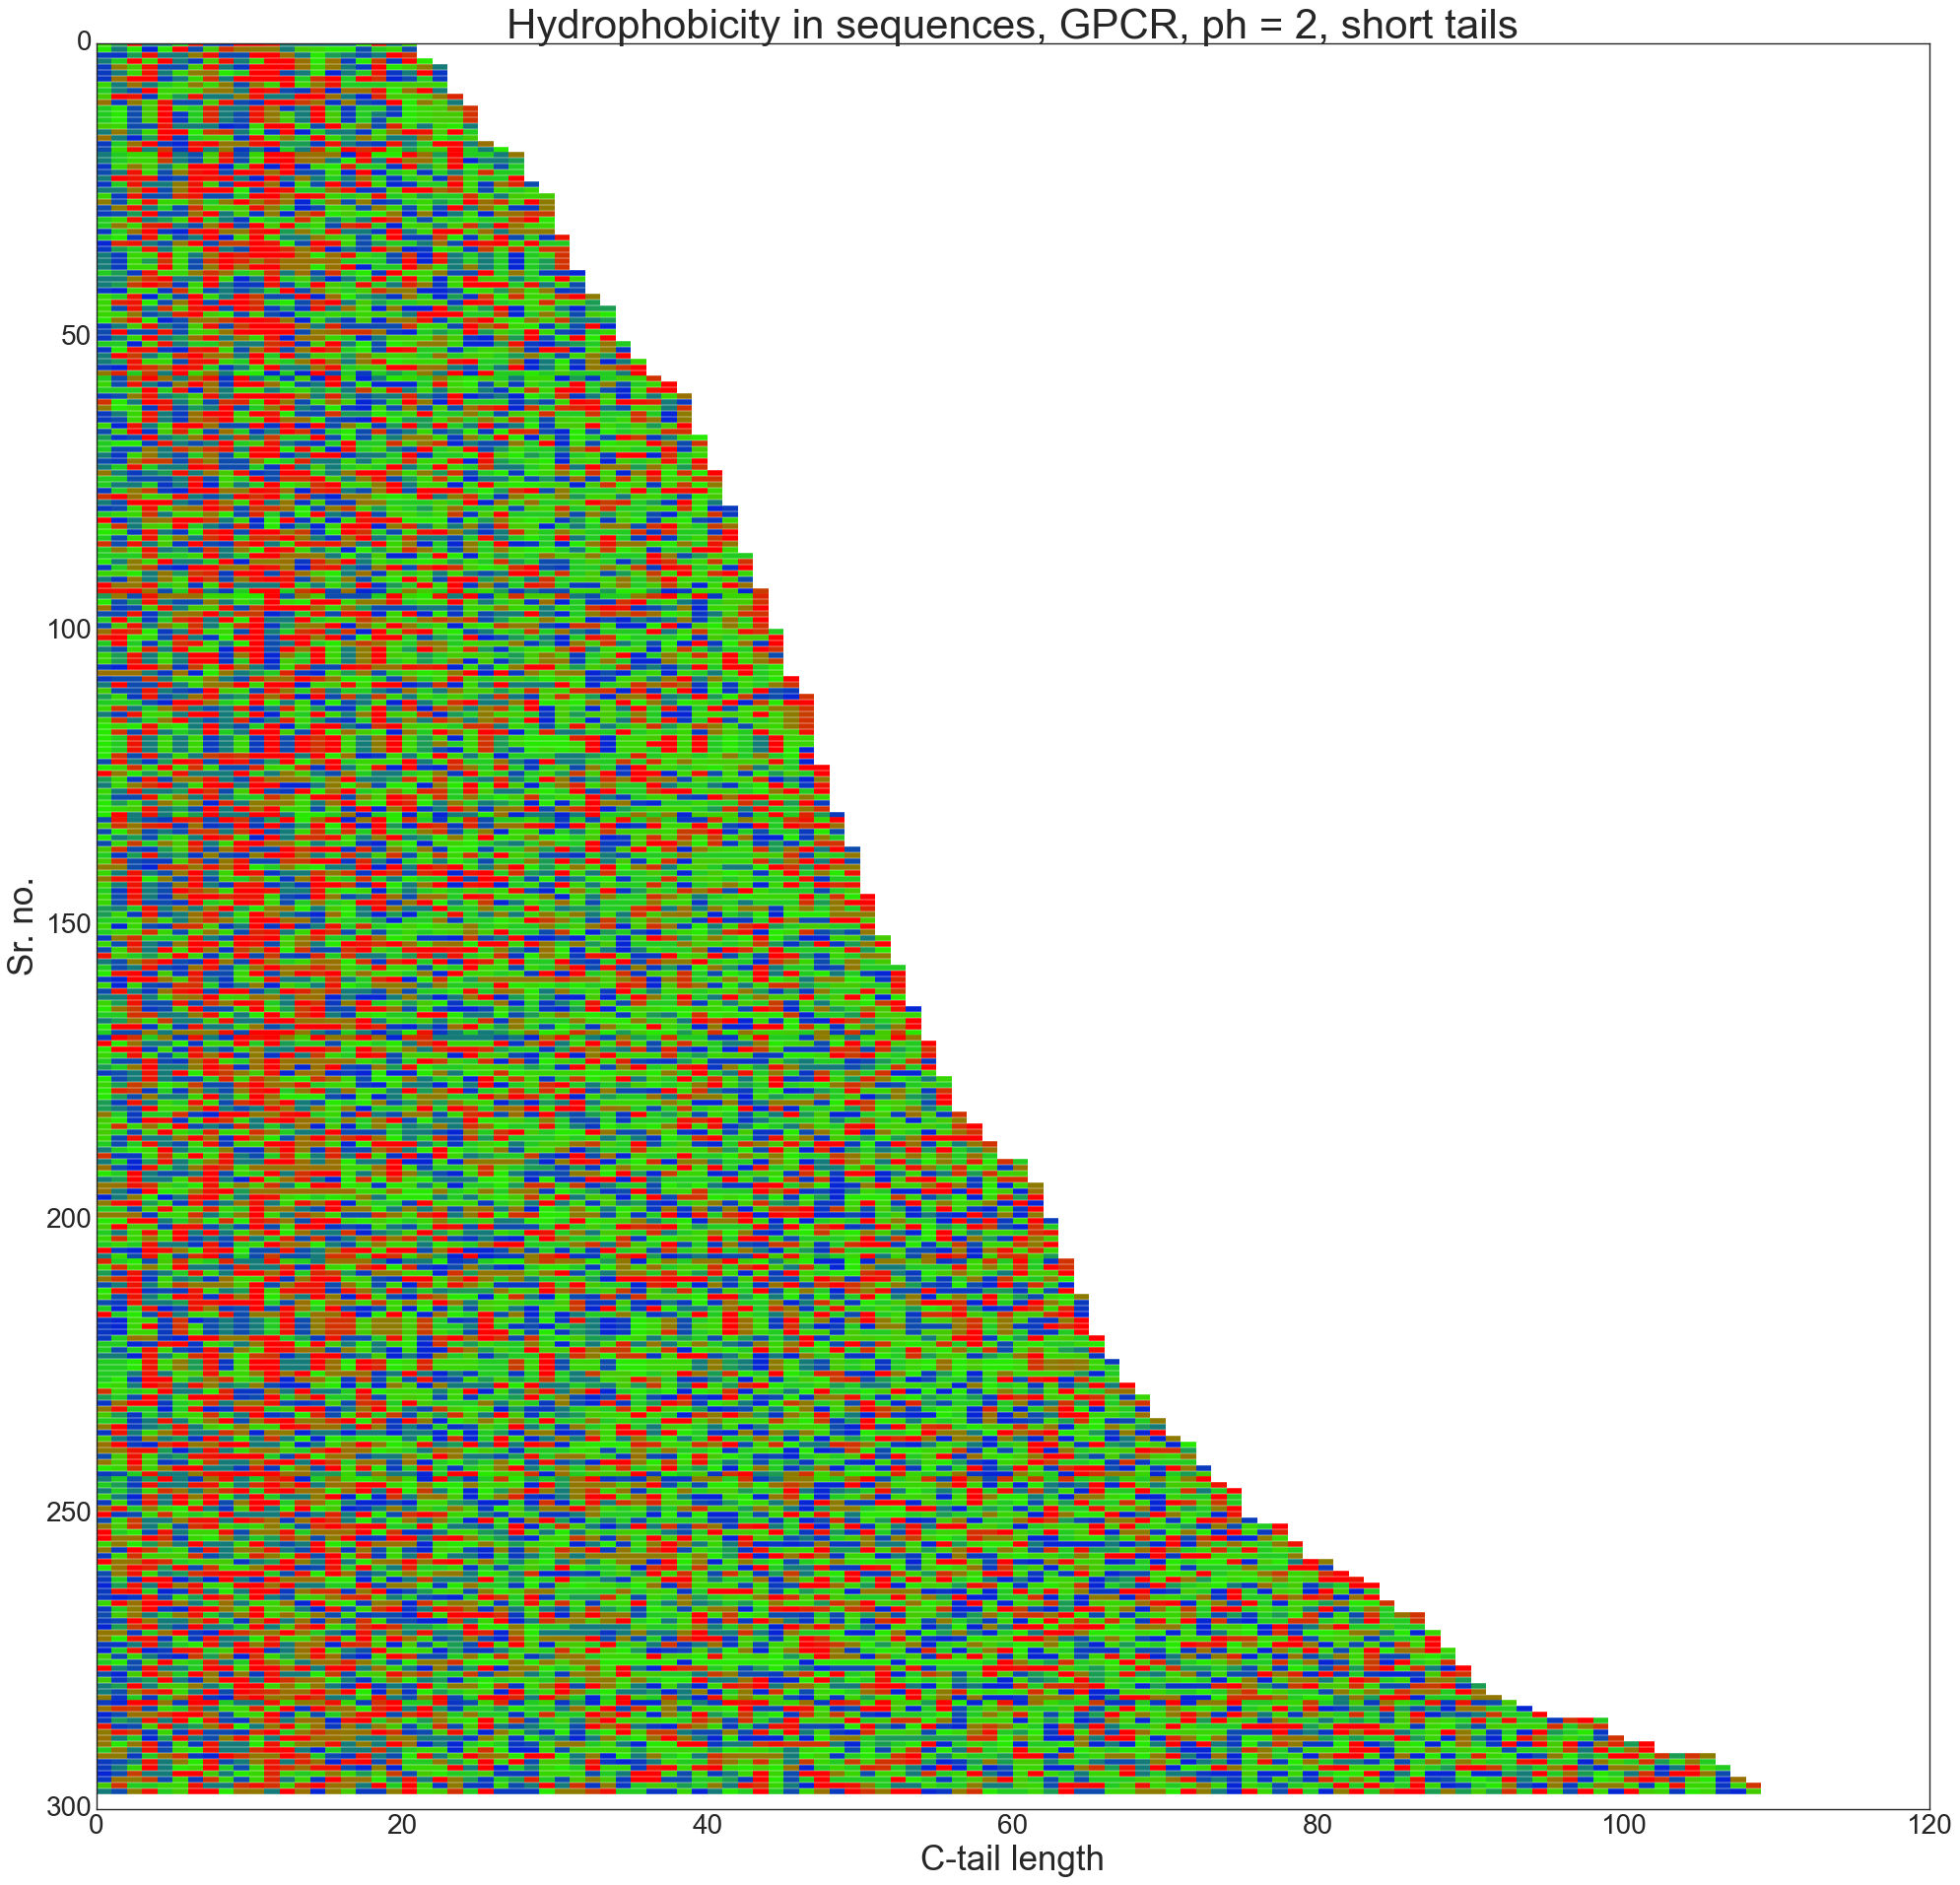

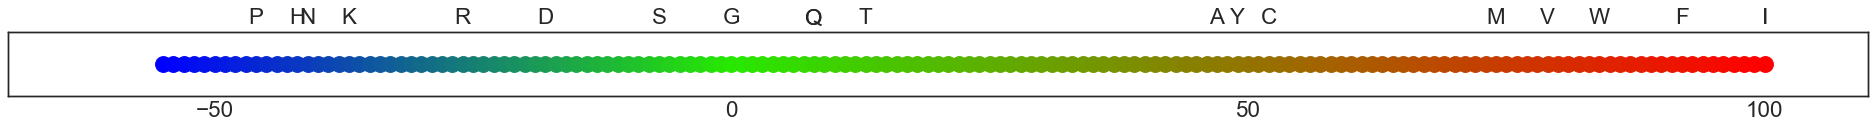

In [13]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           scale_factor = 0.45,
                                           figsize      = (30, 28),
                                           savefig      = False,
                                           # threshold_len_min   = None,
                                           threshold_len_max   = 110,
                                           title_add    = ", ph = 2, short tails"
                                         ) 

# <span style="color:orange"> Hydrophobicity in GPCR at ph = 7 </span>

### All tails

100% |########################################################################|


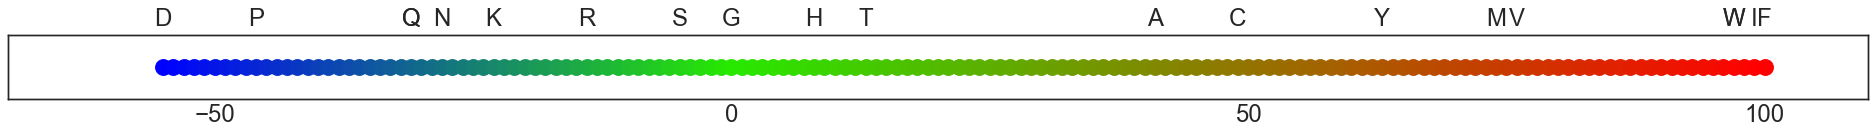

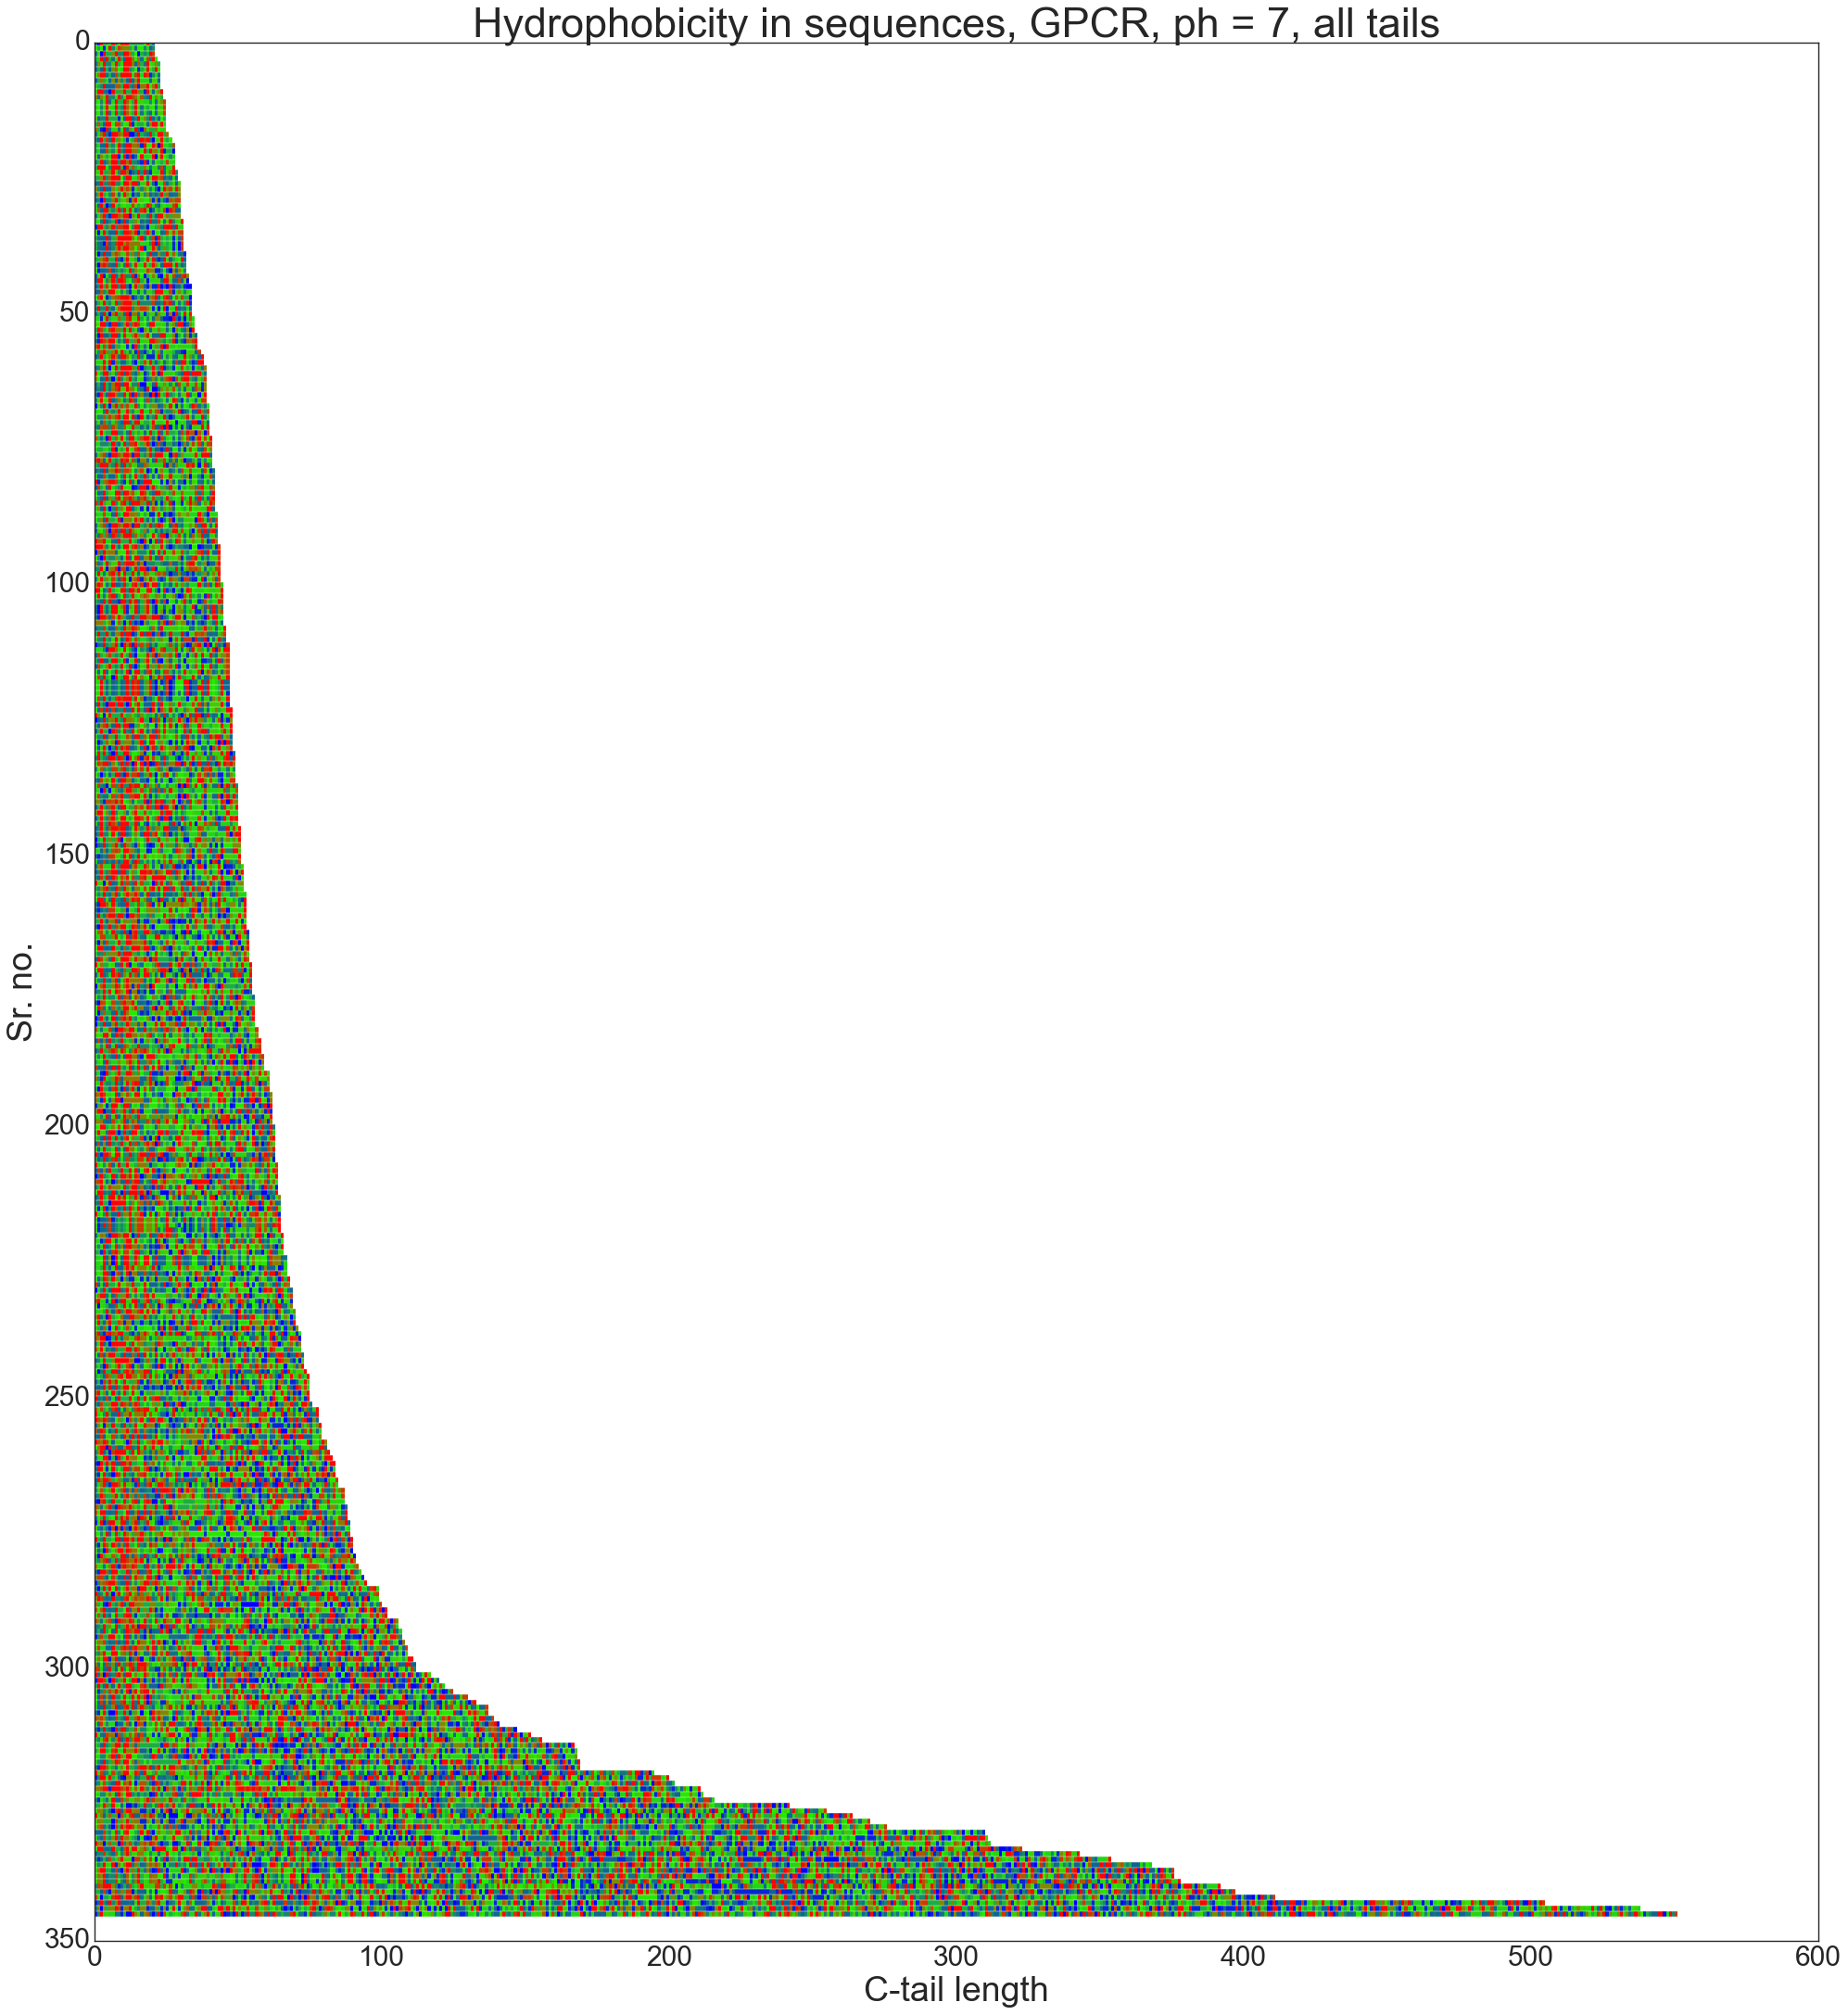

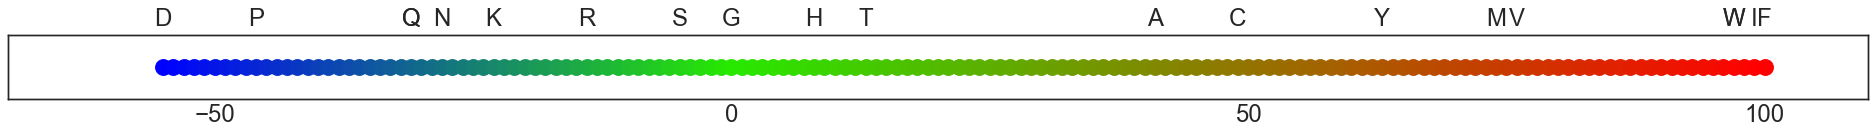

In [16]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           hydrophobicity_aas = gpcr.AA.HYDRO_PHOBICITY_PH7,
                                           scale_factor = 0.45,
                                           figsize      = (30, 32),
                                           savefig      = False,
                                           title_add    = ", ph = 7, all tails"
                                         ) 

### Long tails

100% |########################################################################|


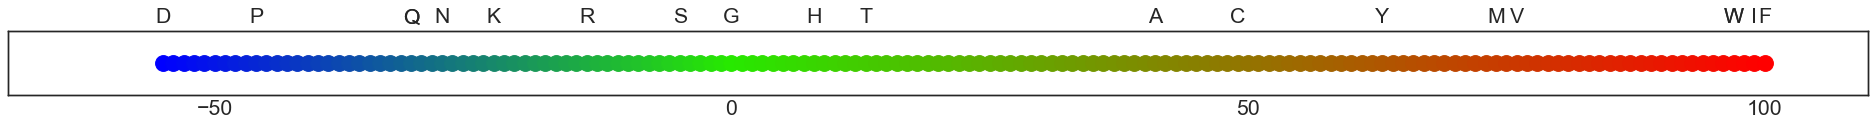

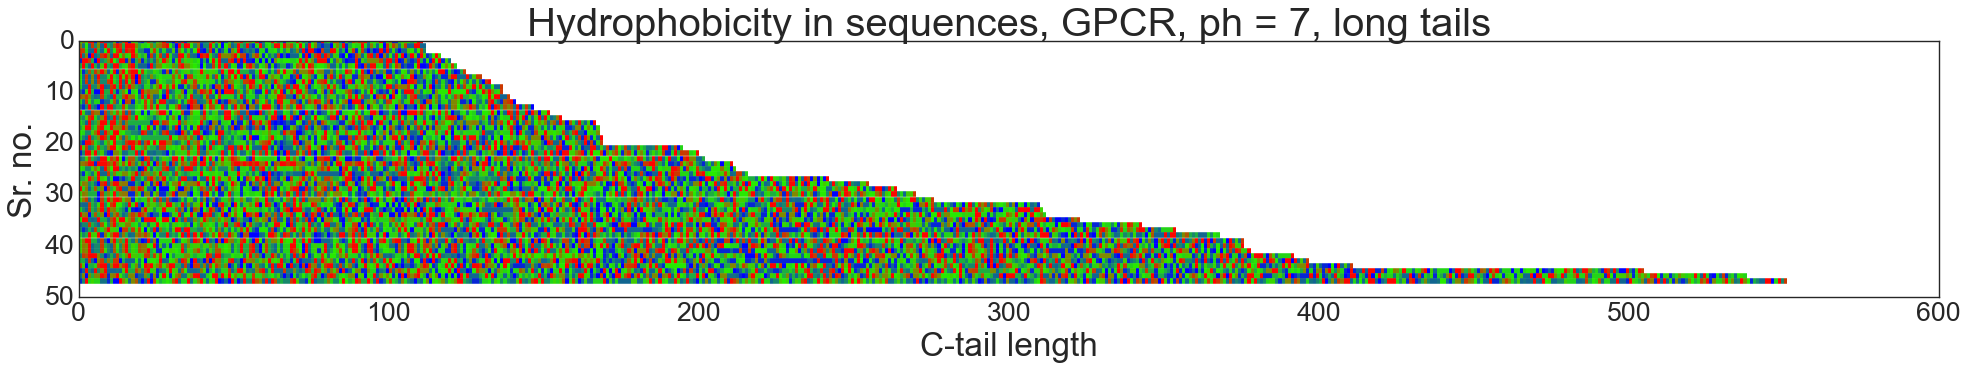

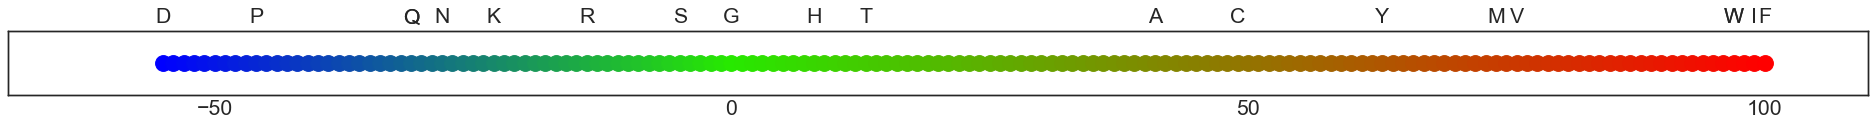

In [17]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           hydrophobicity_aas = gpcr.AA.HYDRO_PHOBICITY_PH7,
                                           scale_factor = 3,
                                           figsize      = (30, 4),
                                           # normalized   = False,
                                           savefig      = False,
                                           threshold_len_min   = 110,
                                           # threshold_len_max   = None,
                                           title_add    = ", ph = 7, long tails"
                                         ) 

### Short tails

100% |########################################################################|


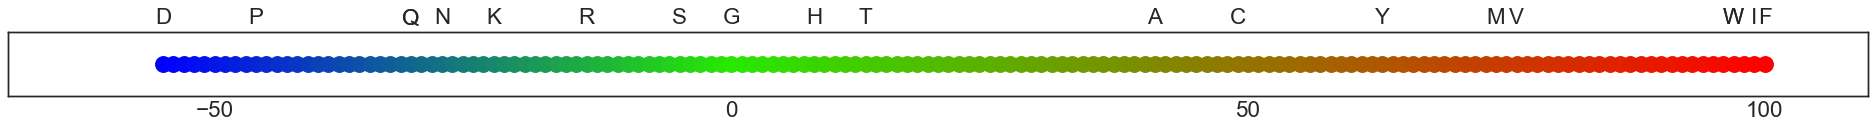

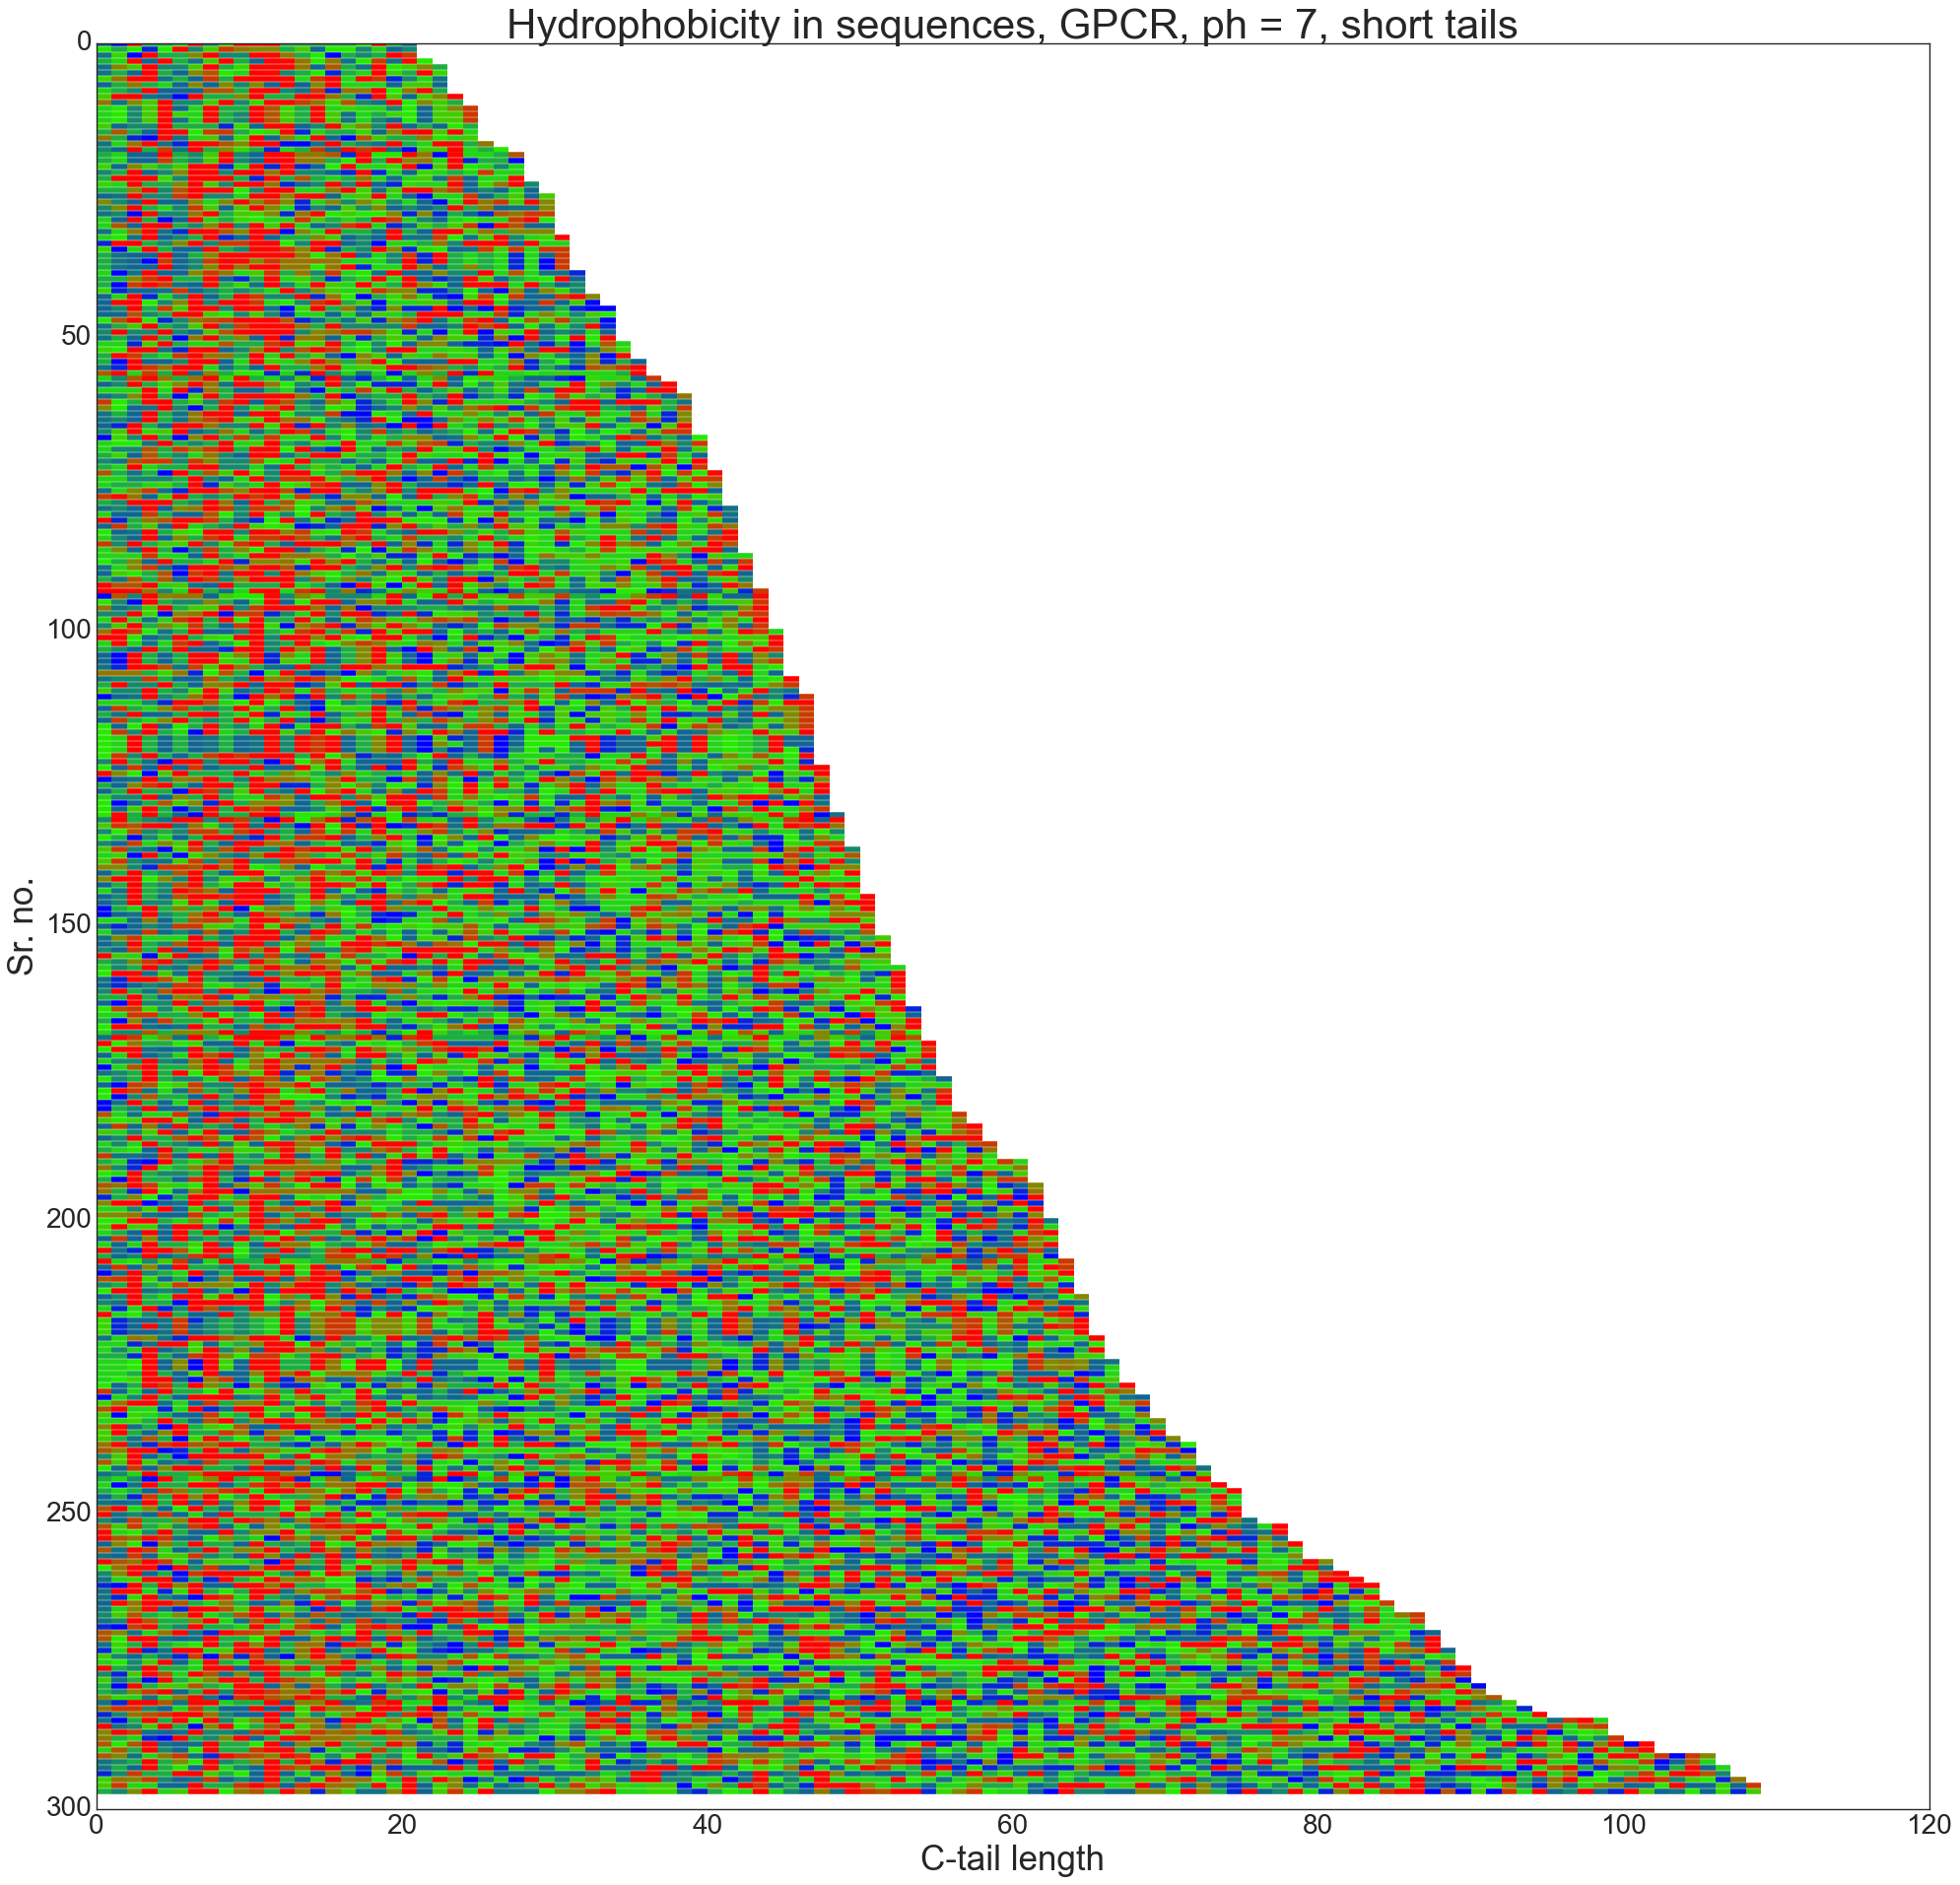

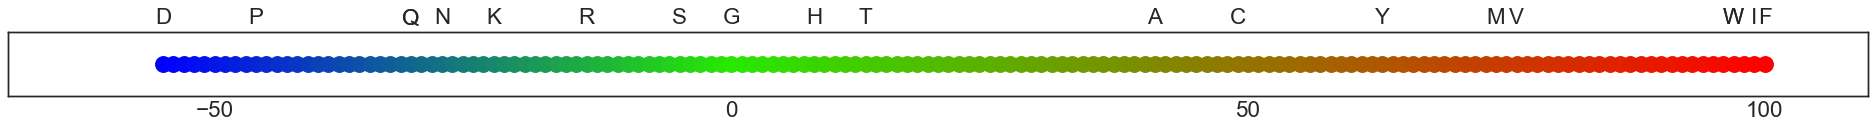

In [18]:
_ = gpcr.line_hydrophobicity_in_sequences( 
                                           hydrophobicity_aas = gpcr.AA.HYDRO_PHOBICITY_PH7,
                                           scale_factor = 0.45,
                                           figsize      = (30, 28),
                                           savefig      = False,
                                           # threshold_len_min   = None,
                                           threshold_len_max   = 110,
                                           title_add    = ", ph = 7, short tails"
                                         ) 

# <span style="color:red"> Hydrophobicity in Disprot </span>

# <span style="color:orange"> Hydrophobicity in DisProt at ph = 2 </span>

100% |########################################################################|


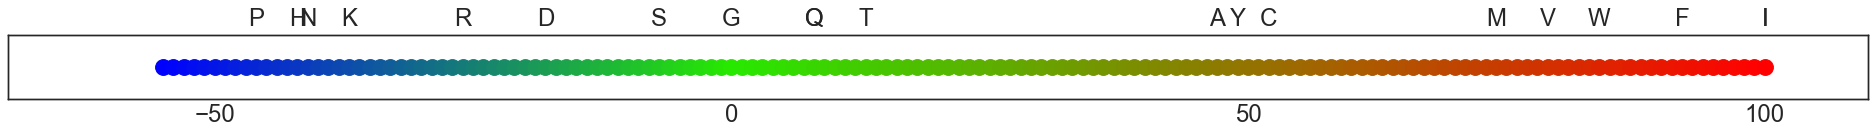

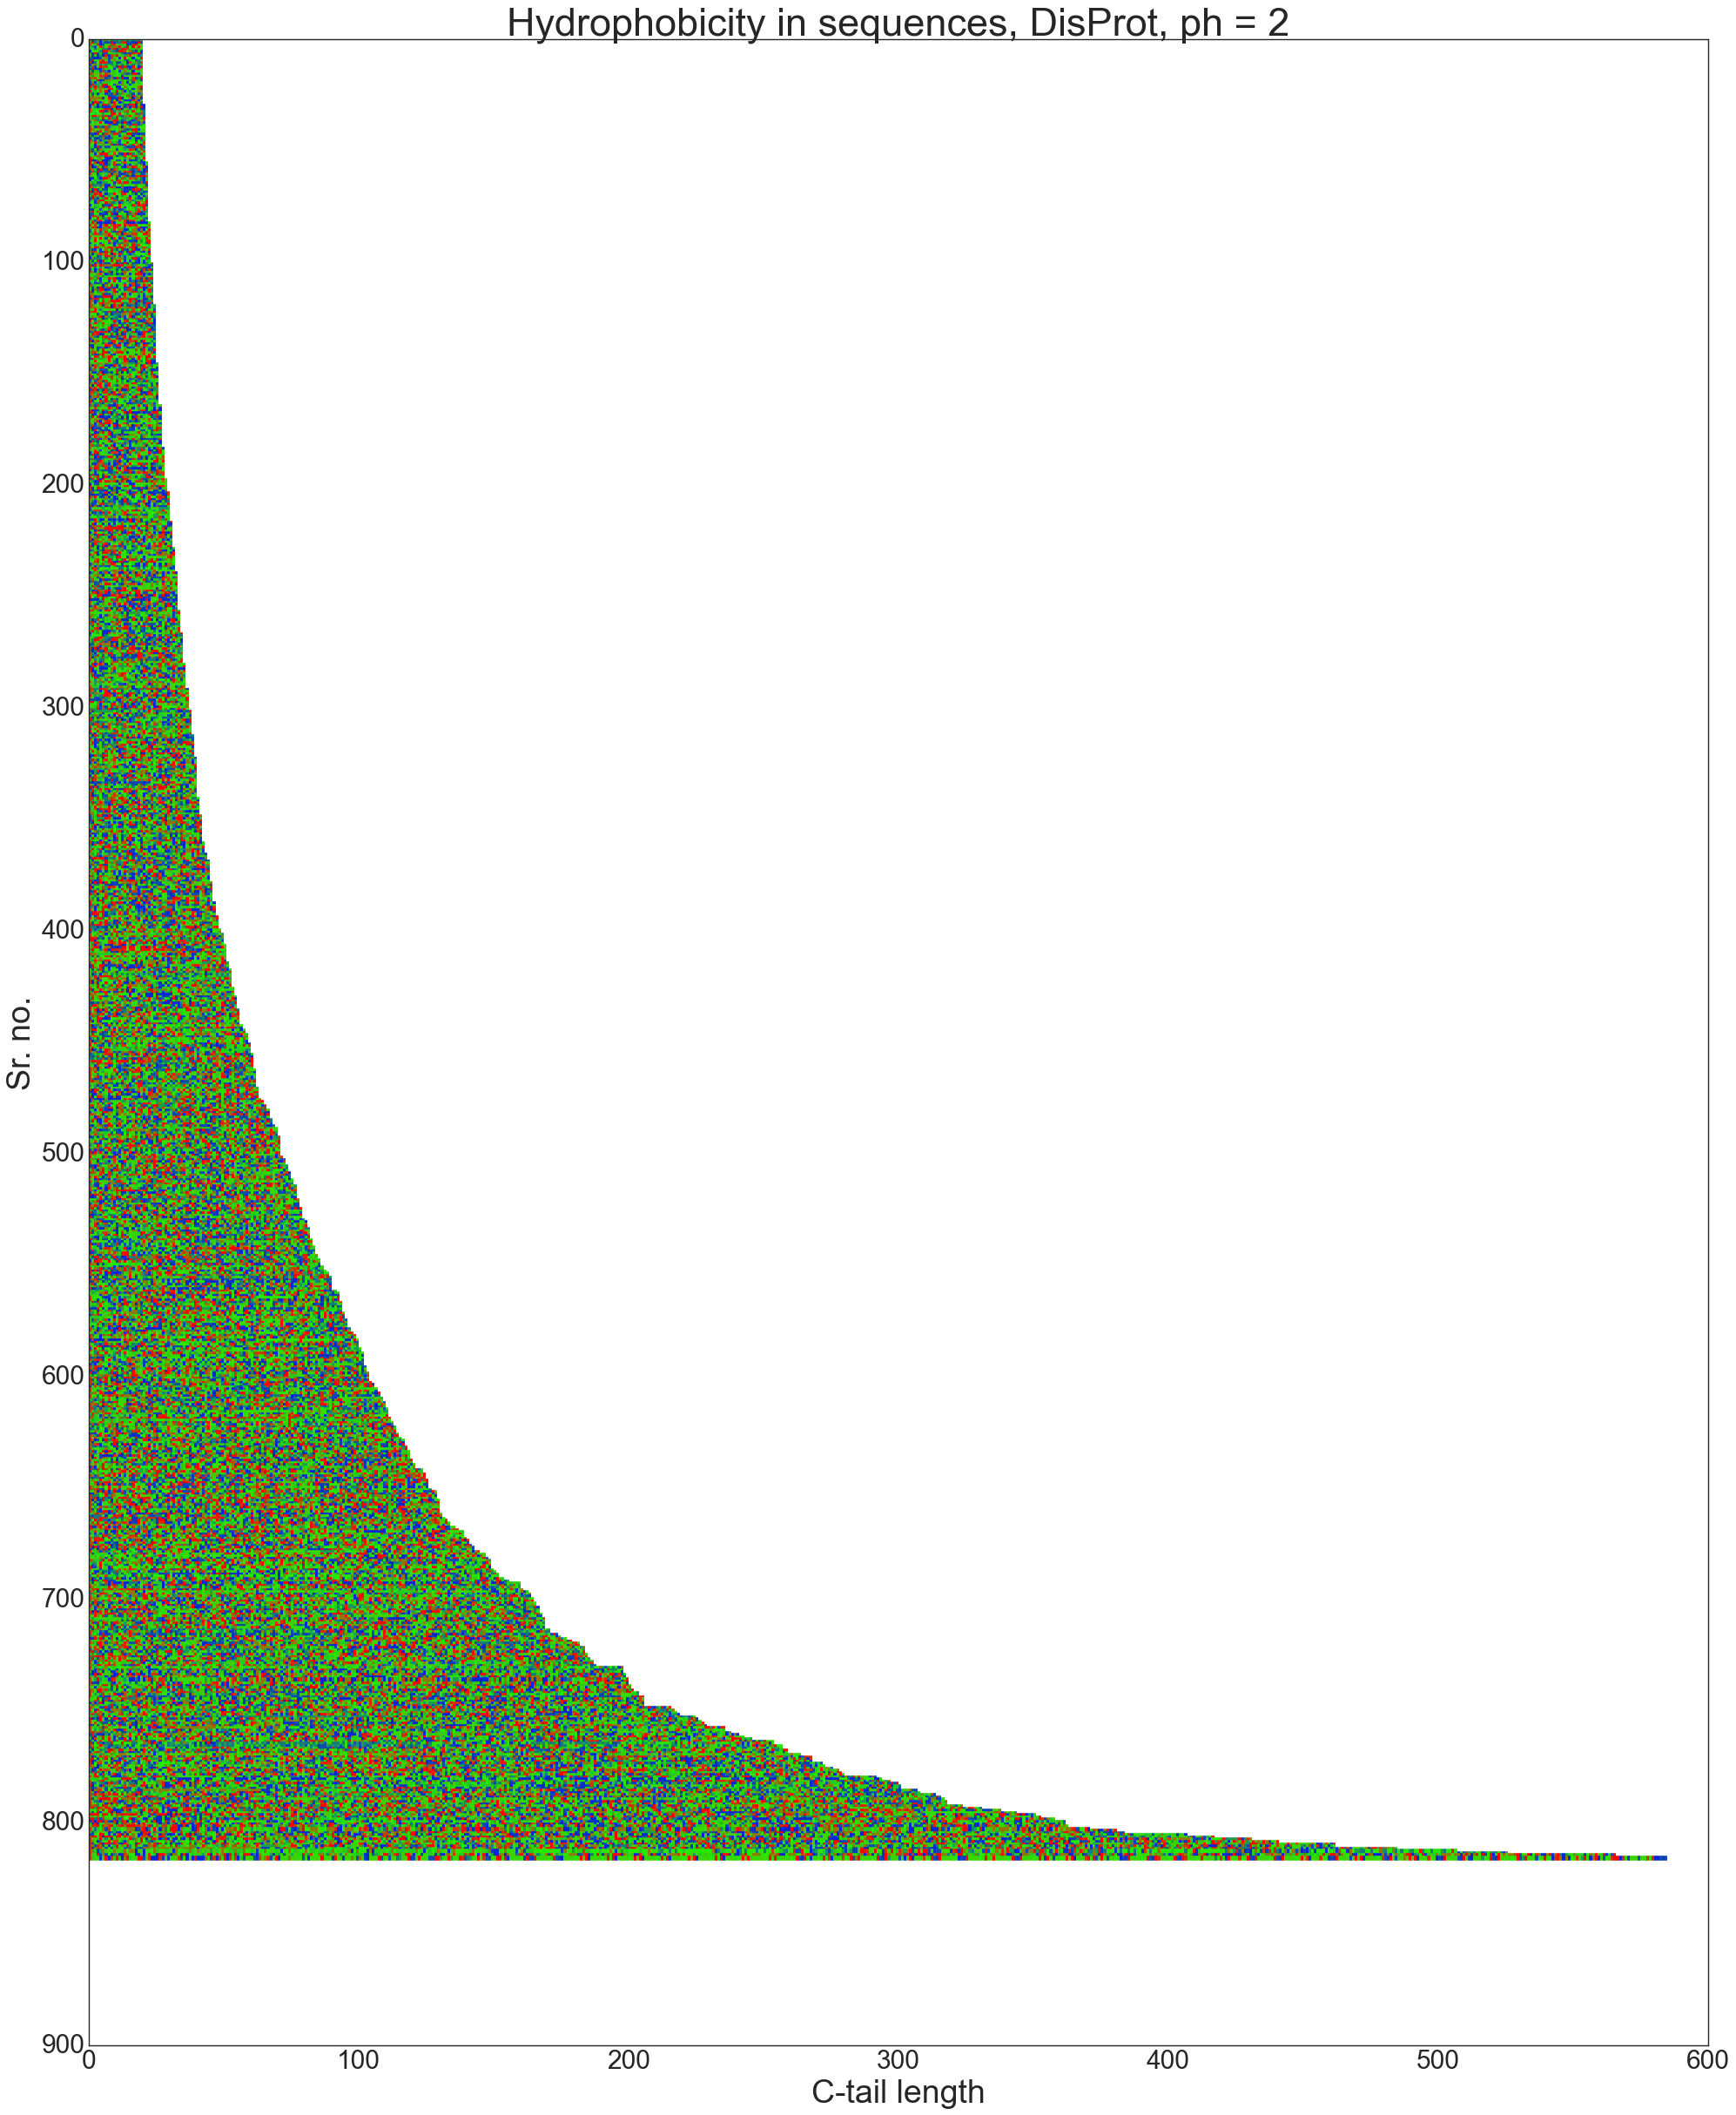

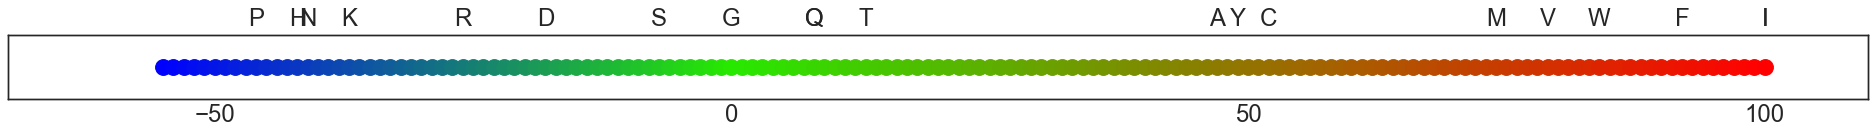

In [19]:
_ = gpcr.line_hydrophobicity_in_sequences( # sequences    = gpcr.DISPROT_DF[0:500]["seq"],
                                       df = gpcr.DISPROT_DF,
                                       scale_factor = 0.45,
                                       figsize      = (30, 36),
                                       # normalized   = False,
                                       # savefig      = True,
                                       title_add    = ", ph = 2"
                                     ) 

100% |########################################################################|


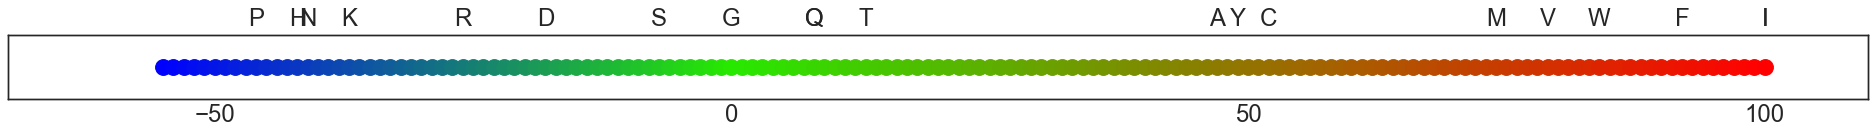

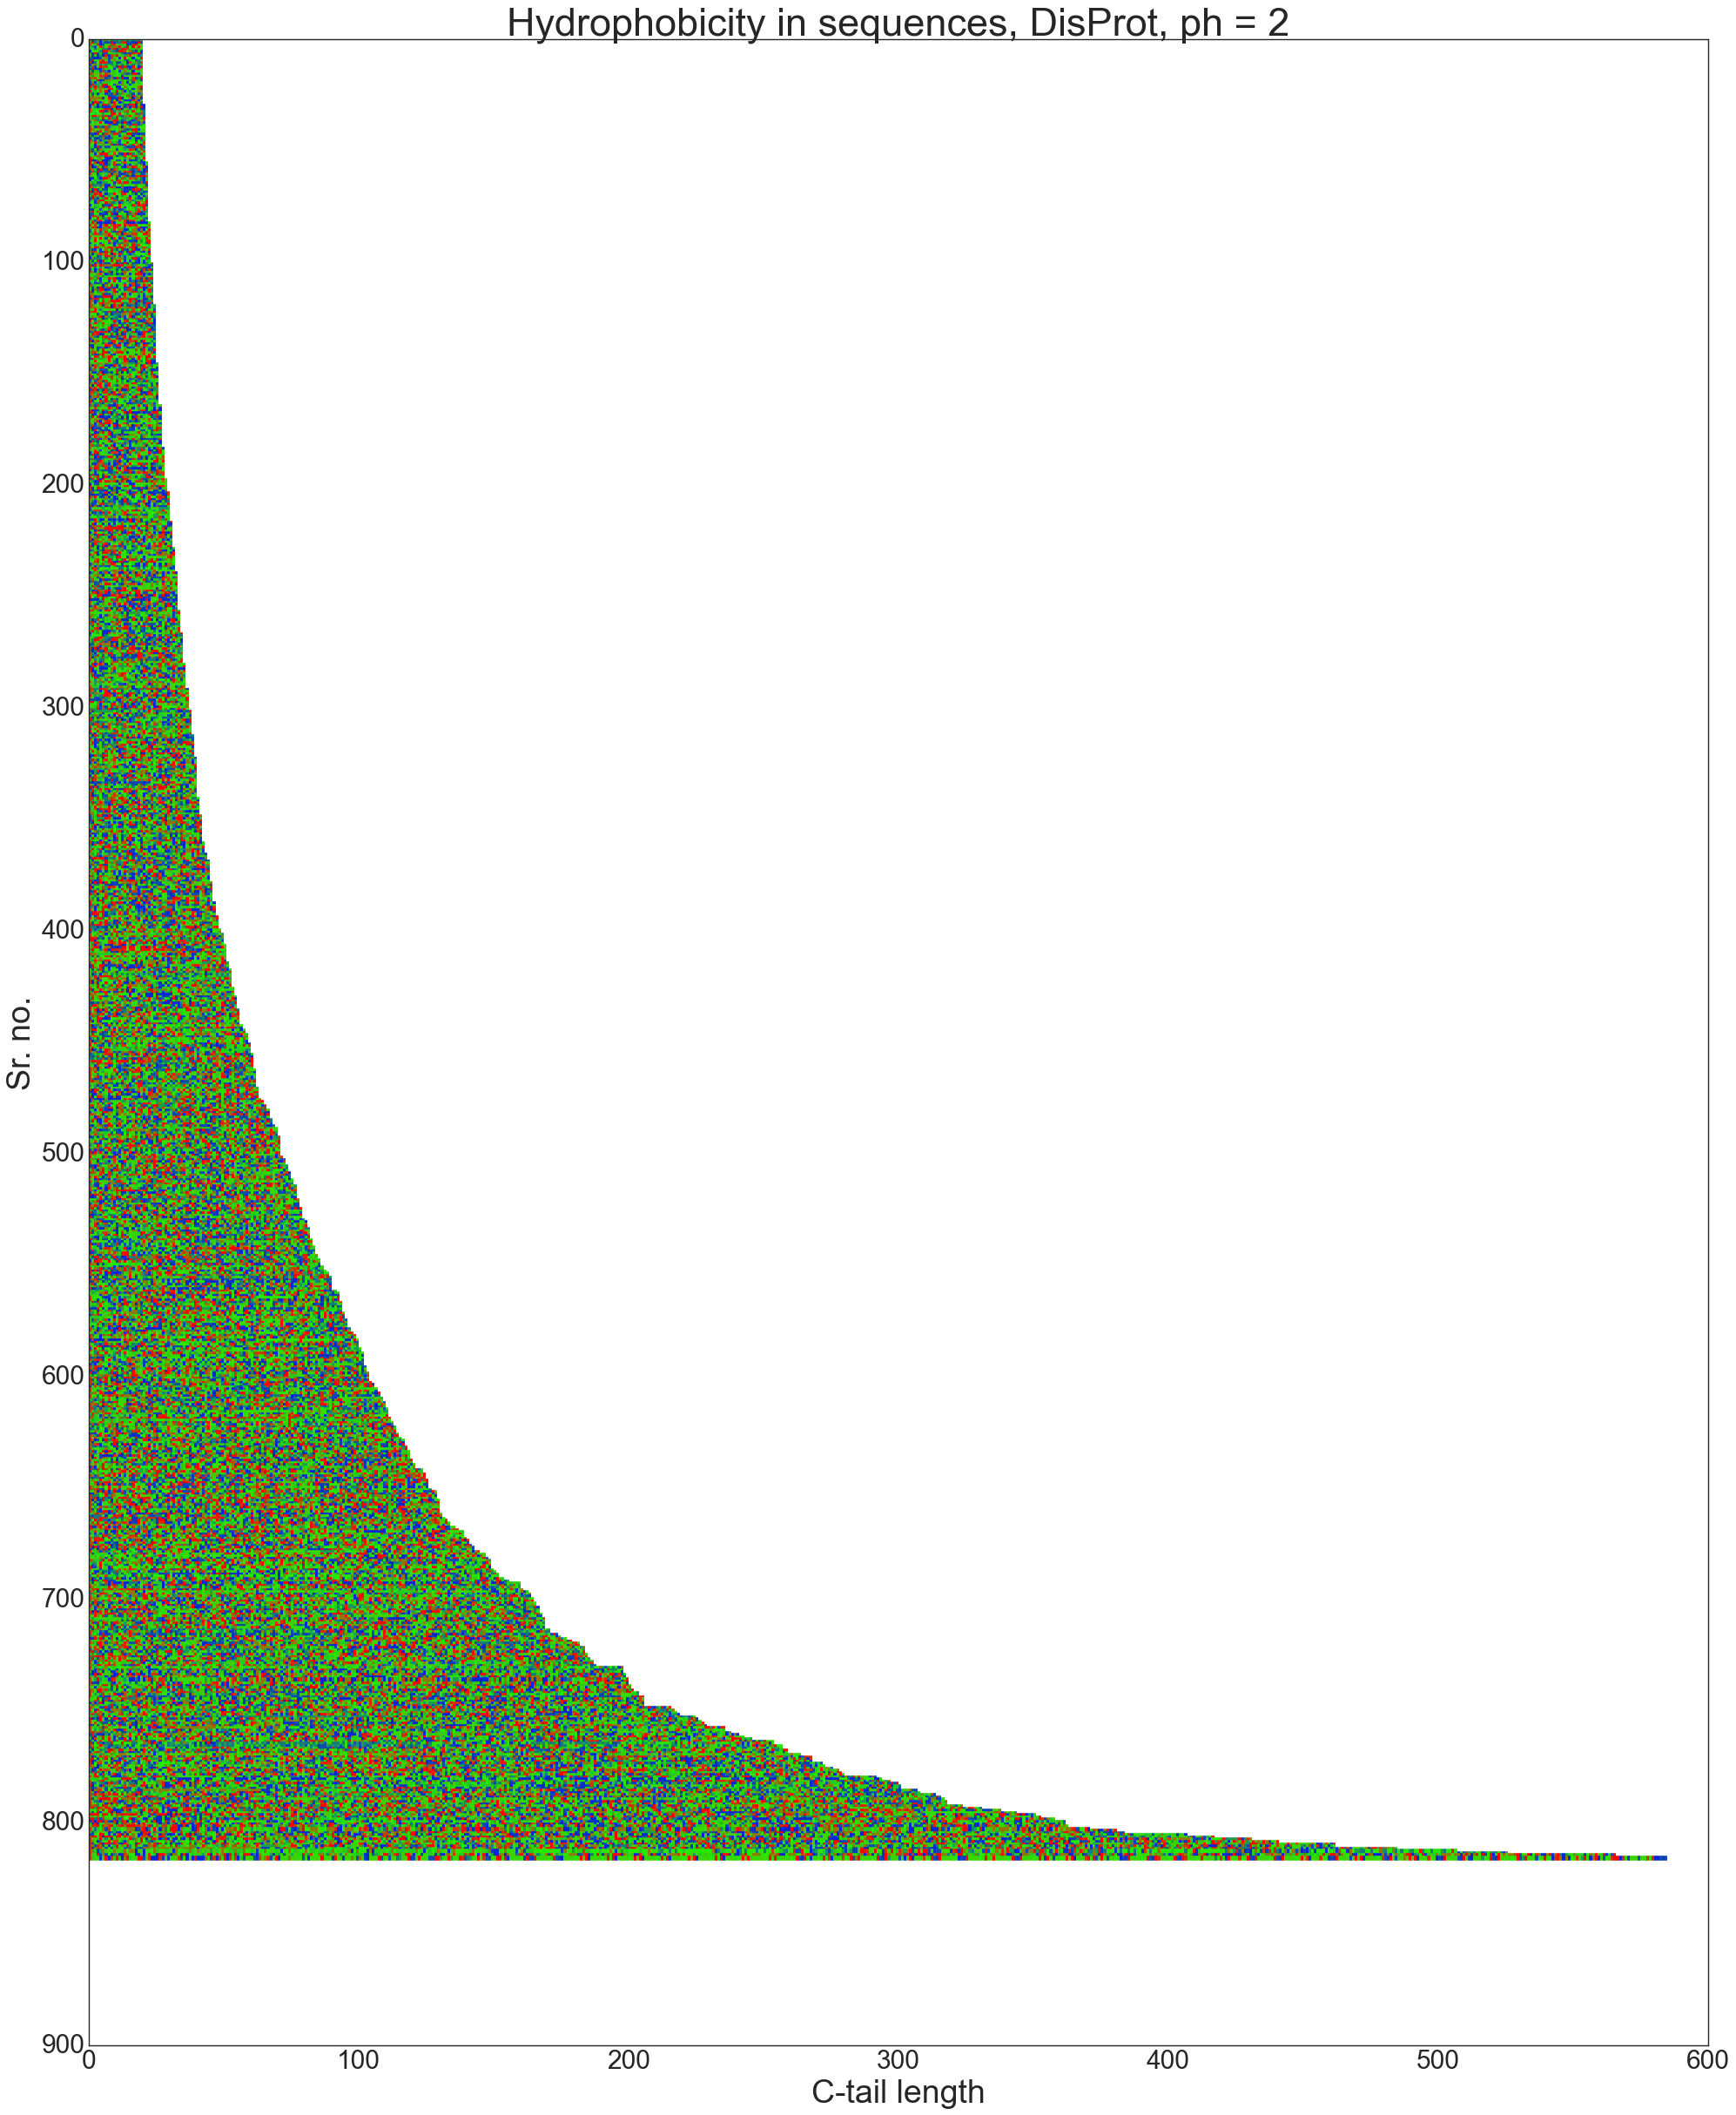

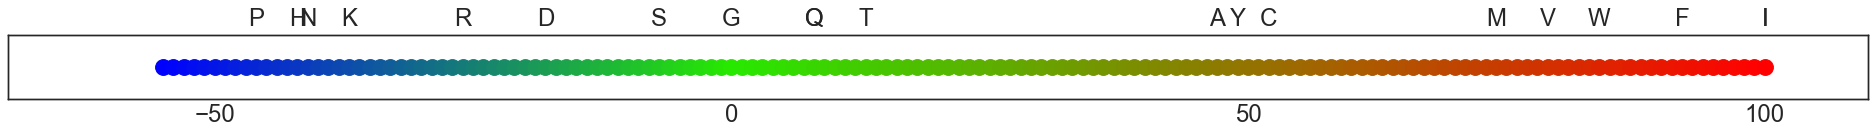

In [20]:
_ = gpcr.line_hydrophobicity_in_sequences( # sequences    = gpcr.DISPROT_DF[0:500]["seq"],
                                       df = gpcr.DISPROT_DF,
                                       scale_factor = 0.45,
                                       figsize      = (30, 36),
                                       normalized   = False,
                                       # savefig      = True,
                                       title_add    = ", ph = 2"
                                     ) 

100% |########################################################################|


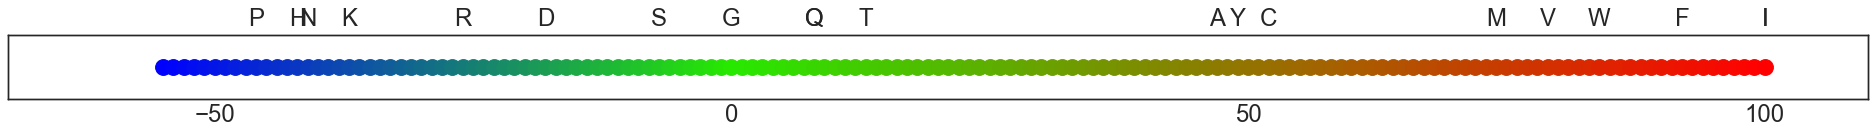

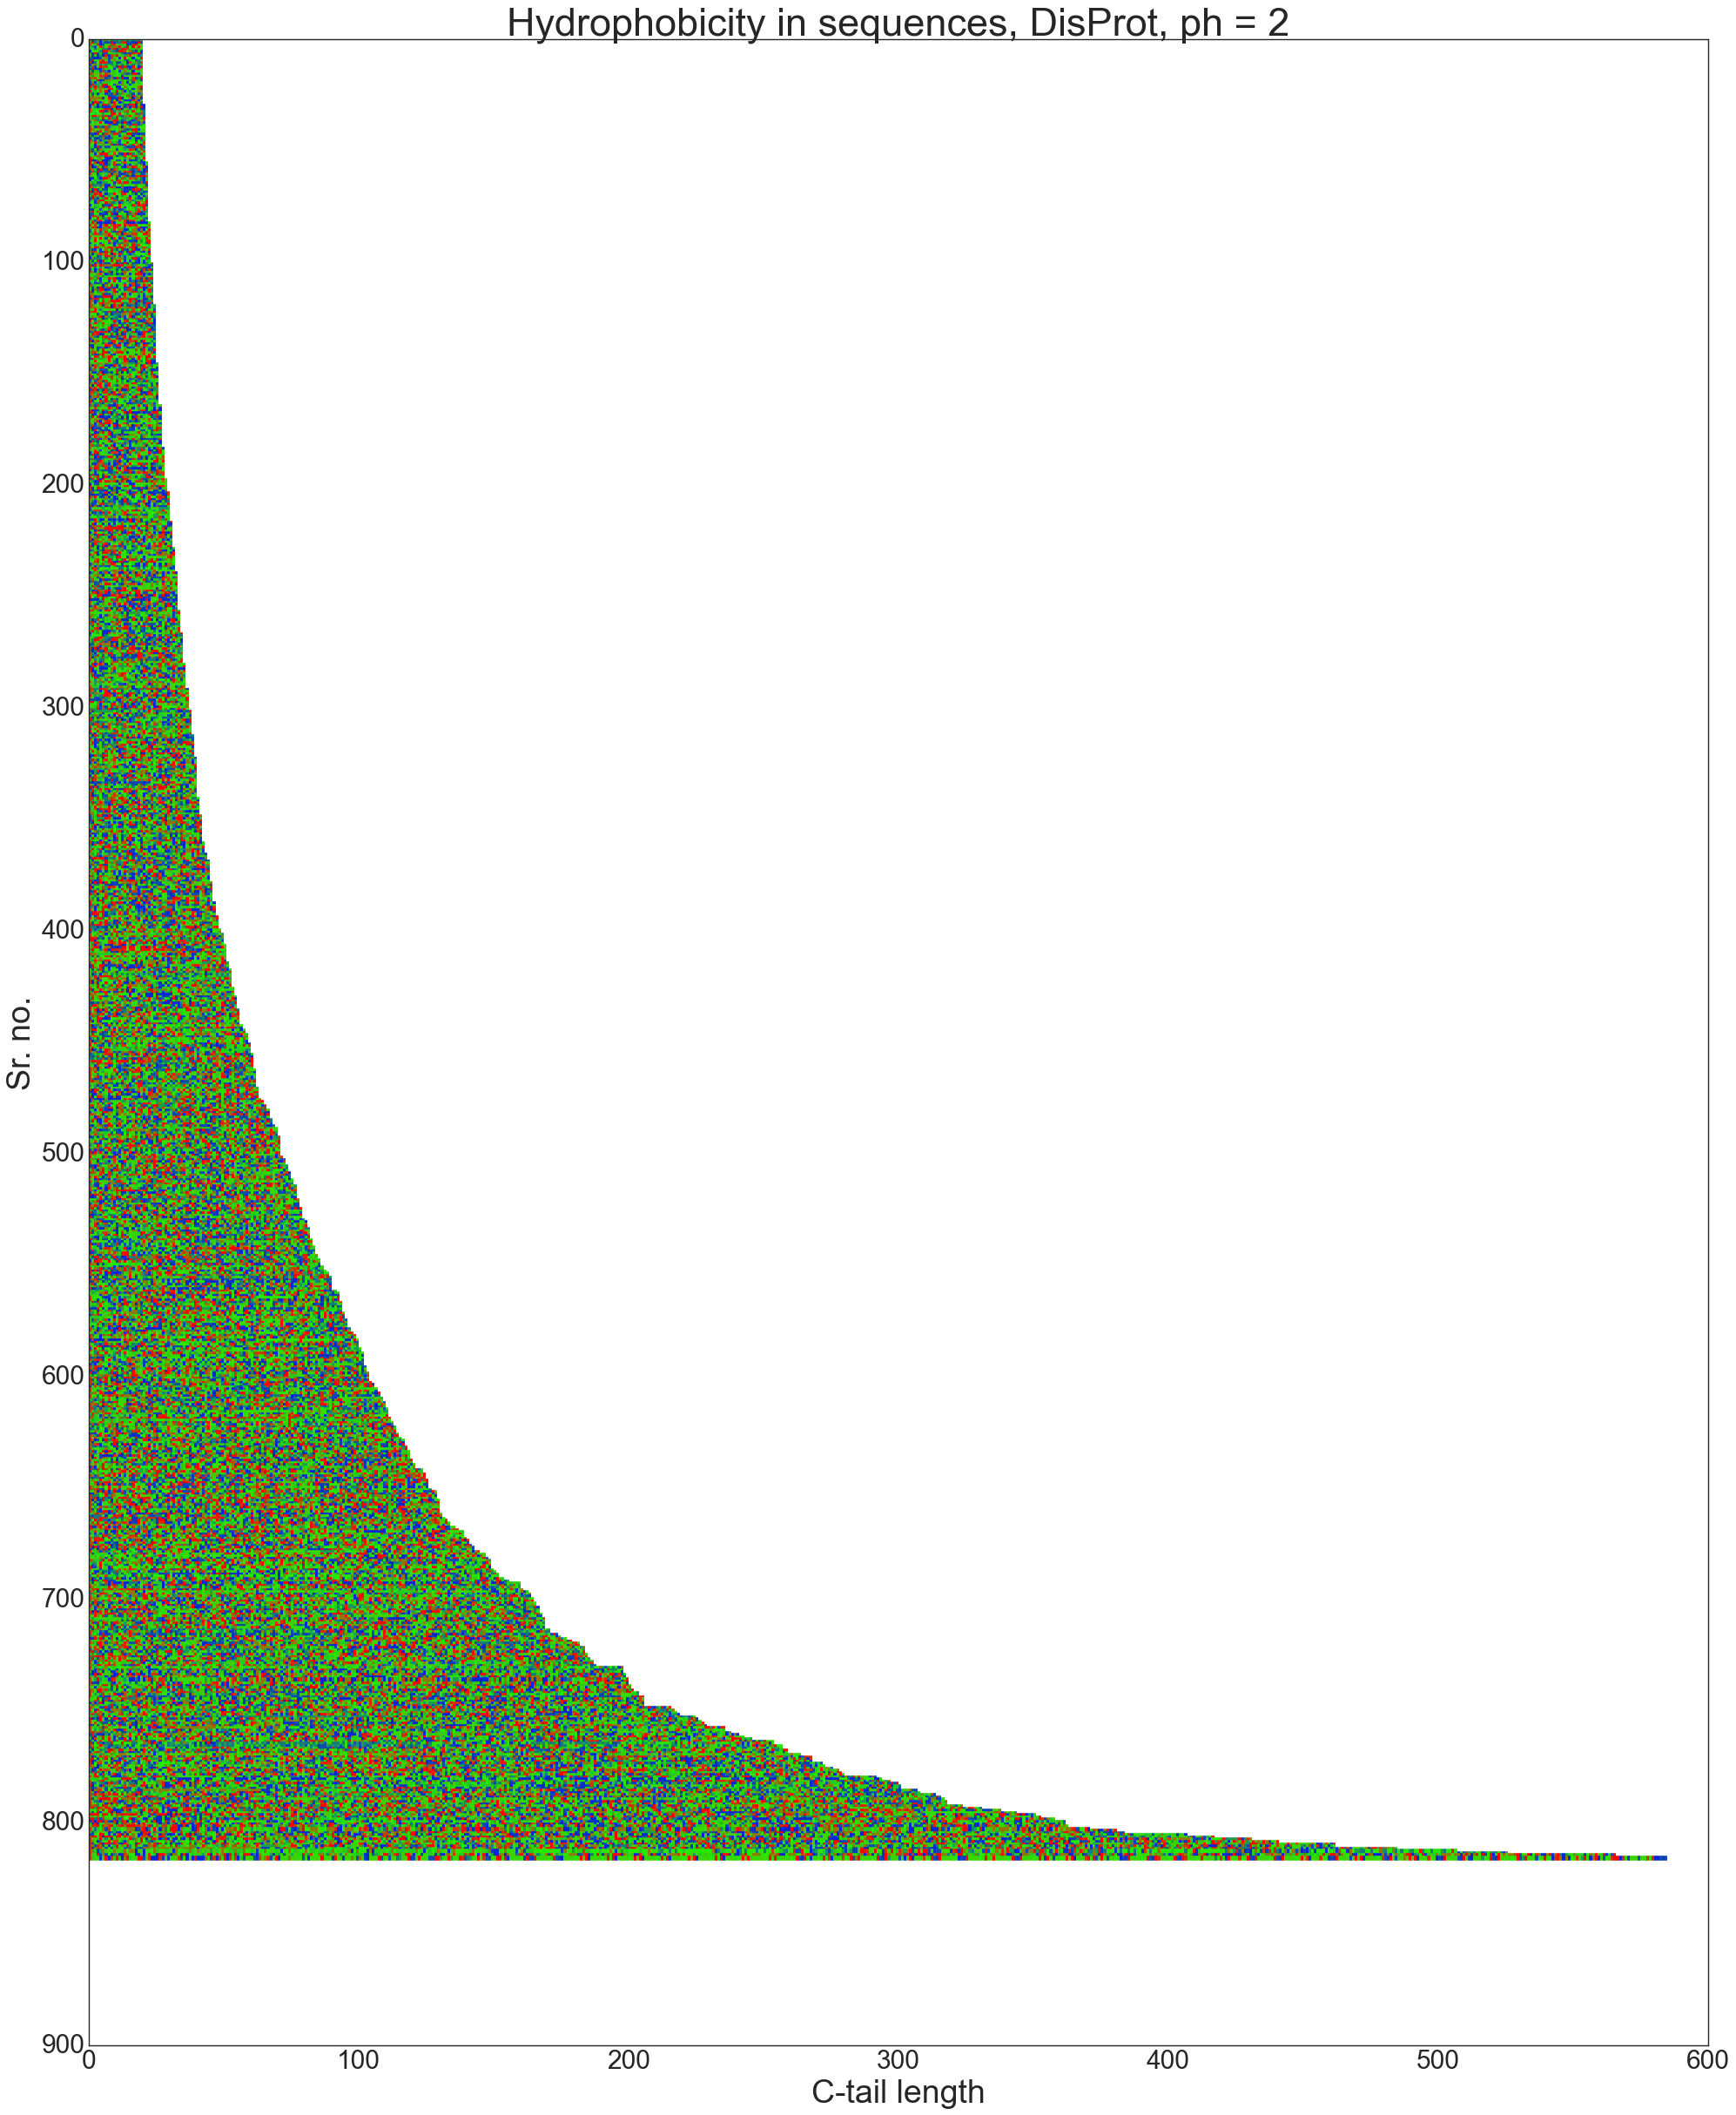

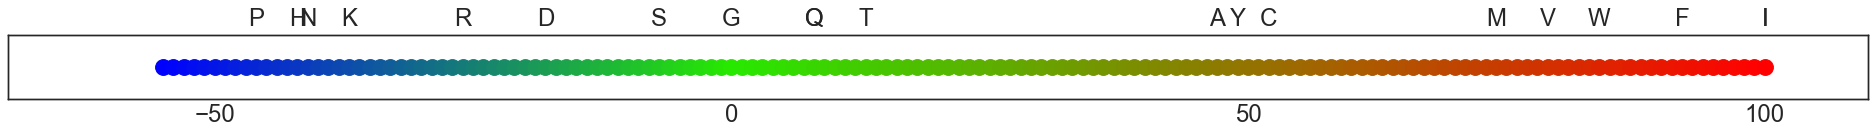

In [21]:
_ = gpcr.line_hydrophobicity_in_sequences( # sequences    = gpcr.DISPROT_DF[0:500]["seq"],
                                       df = gpcr.DISPROT_DF,
                                       scale_factor = 0.45,
                                       figsize      = (30, 36),
                                       normalized   = False,
                                       # savefig      = True,
                                       title_add    = ", ph = 2"
                                     ) 

# <span style="color:orange"> Hydrophobicity in DisProt at ph = 7 </span>

100% |########################################################################|


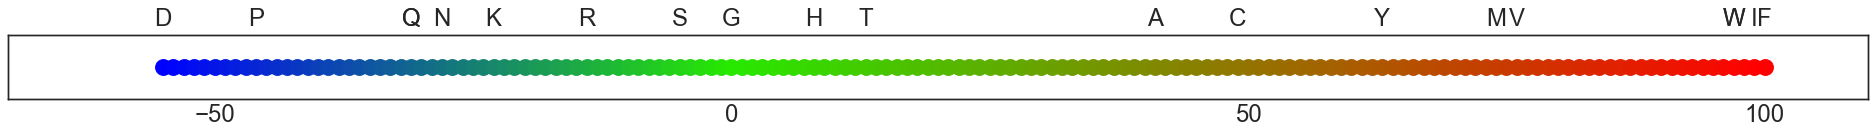

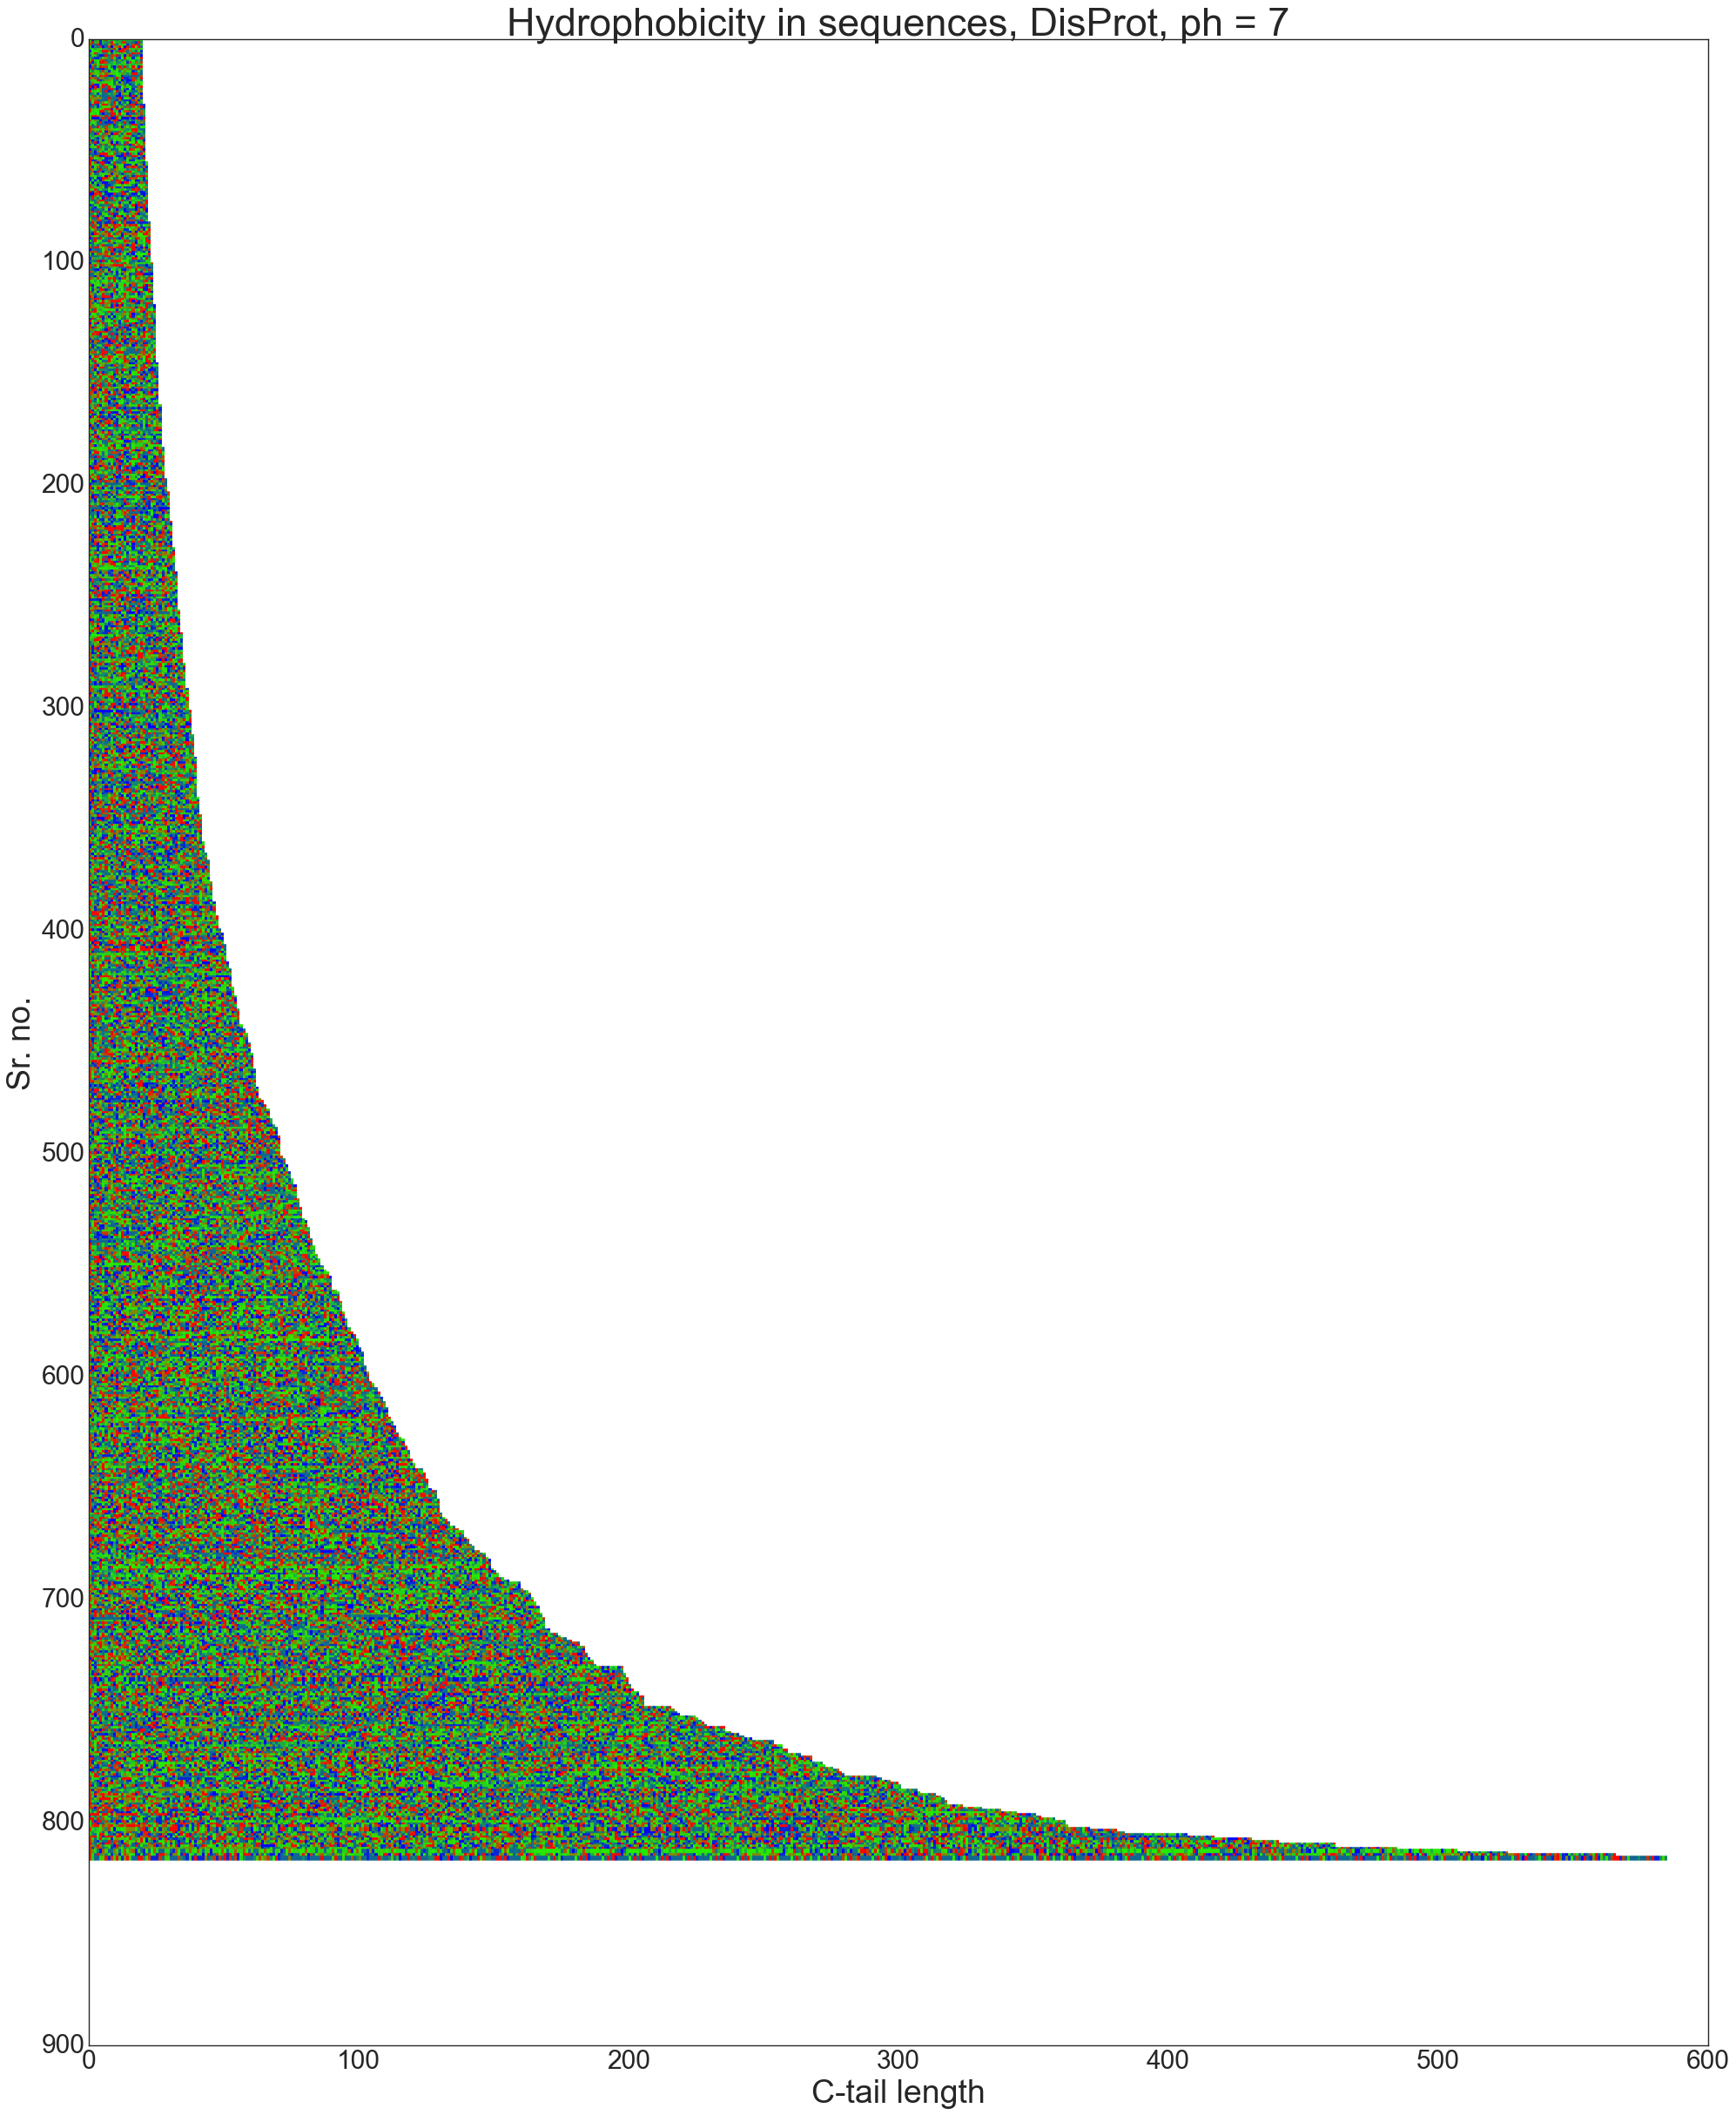

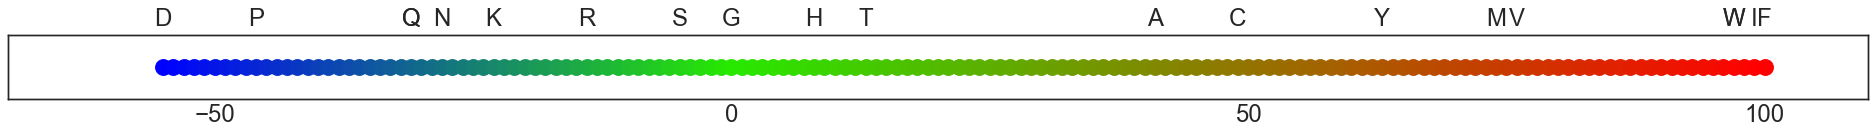

In [22]:
_ = gpcr.line_hydrophobicity_in_sequences( # sequences    = gpcr.DISPROT_DF[0:500]["seq"],
                                       df = gpcr.DISPROT_DF,
                                       hydrophobicity_aas = gpcr.AA.HYDRO_PHOBICITY_PH7,
                                       scale_factor = 0.45,
                                       figsize      = (30, 36),
                                       # normalized   = False,
                                       # savefig      = True,
                                       title_add    = ", ph = 7"
                                     ) 

100% |########################################################################|


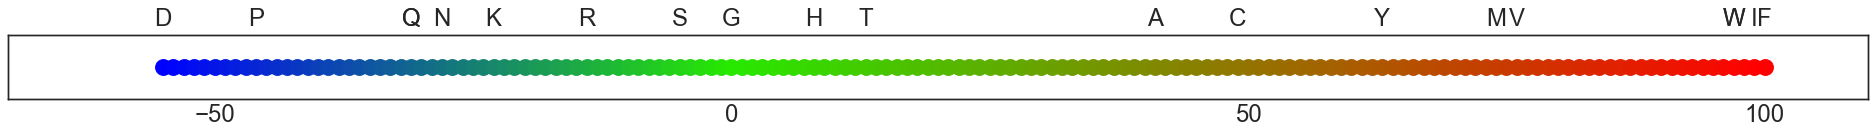

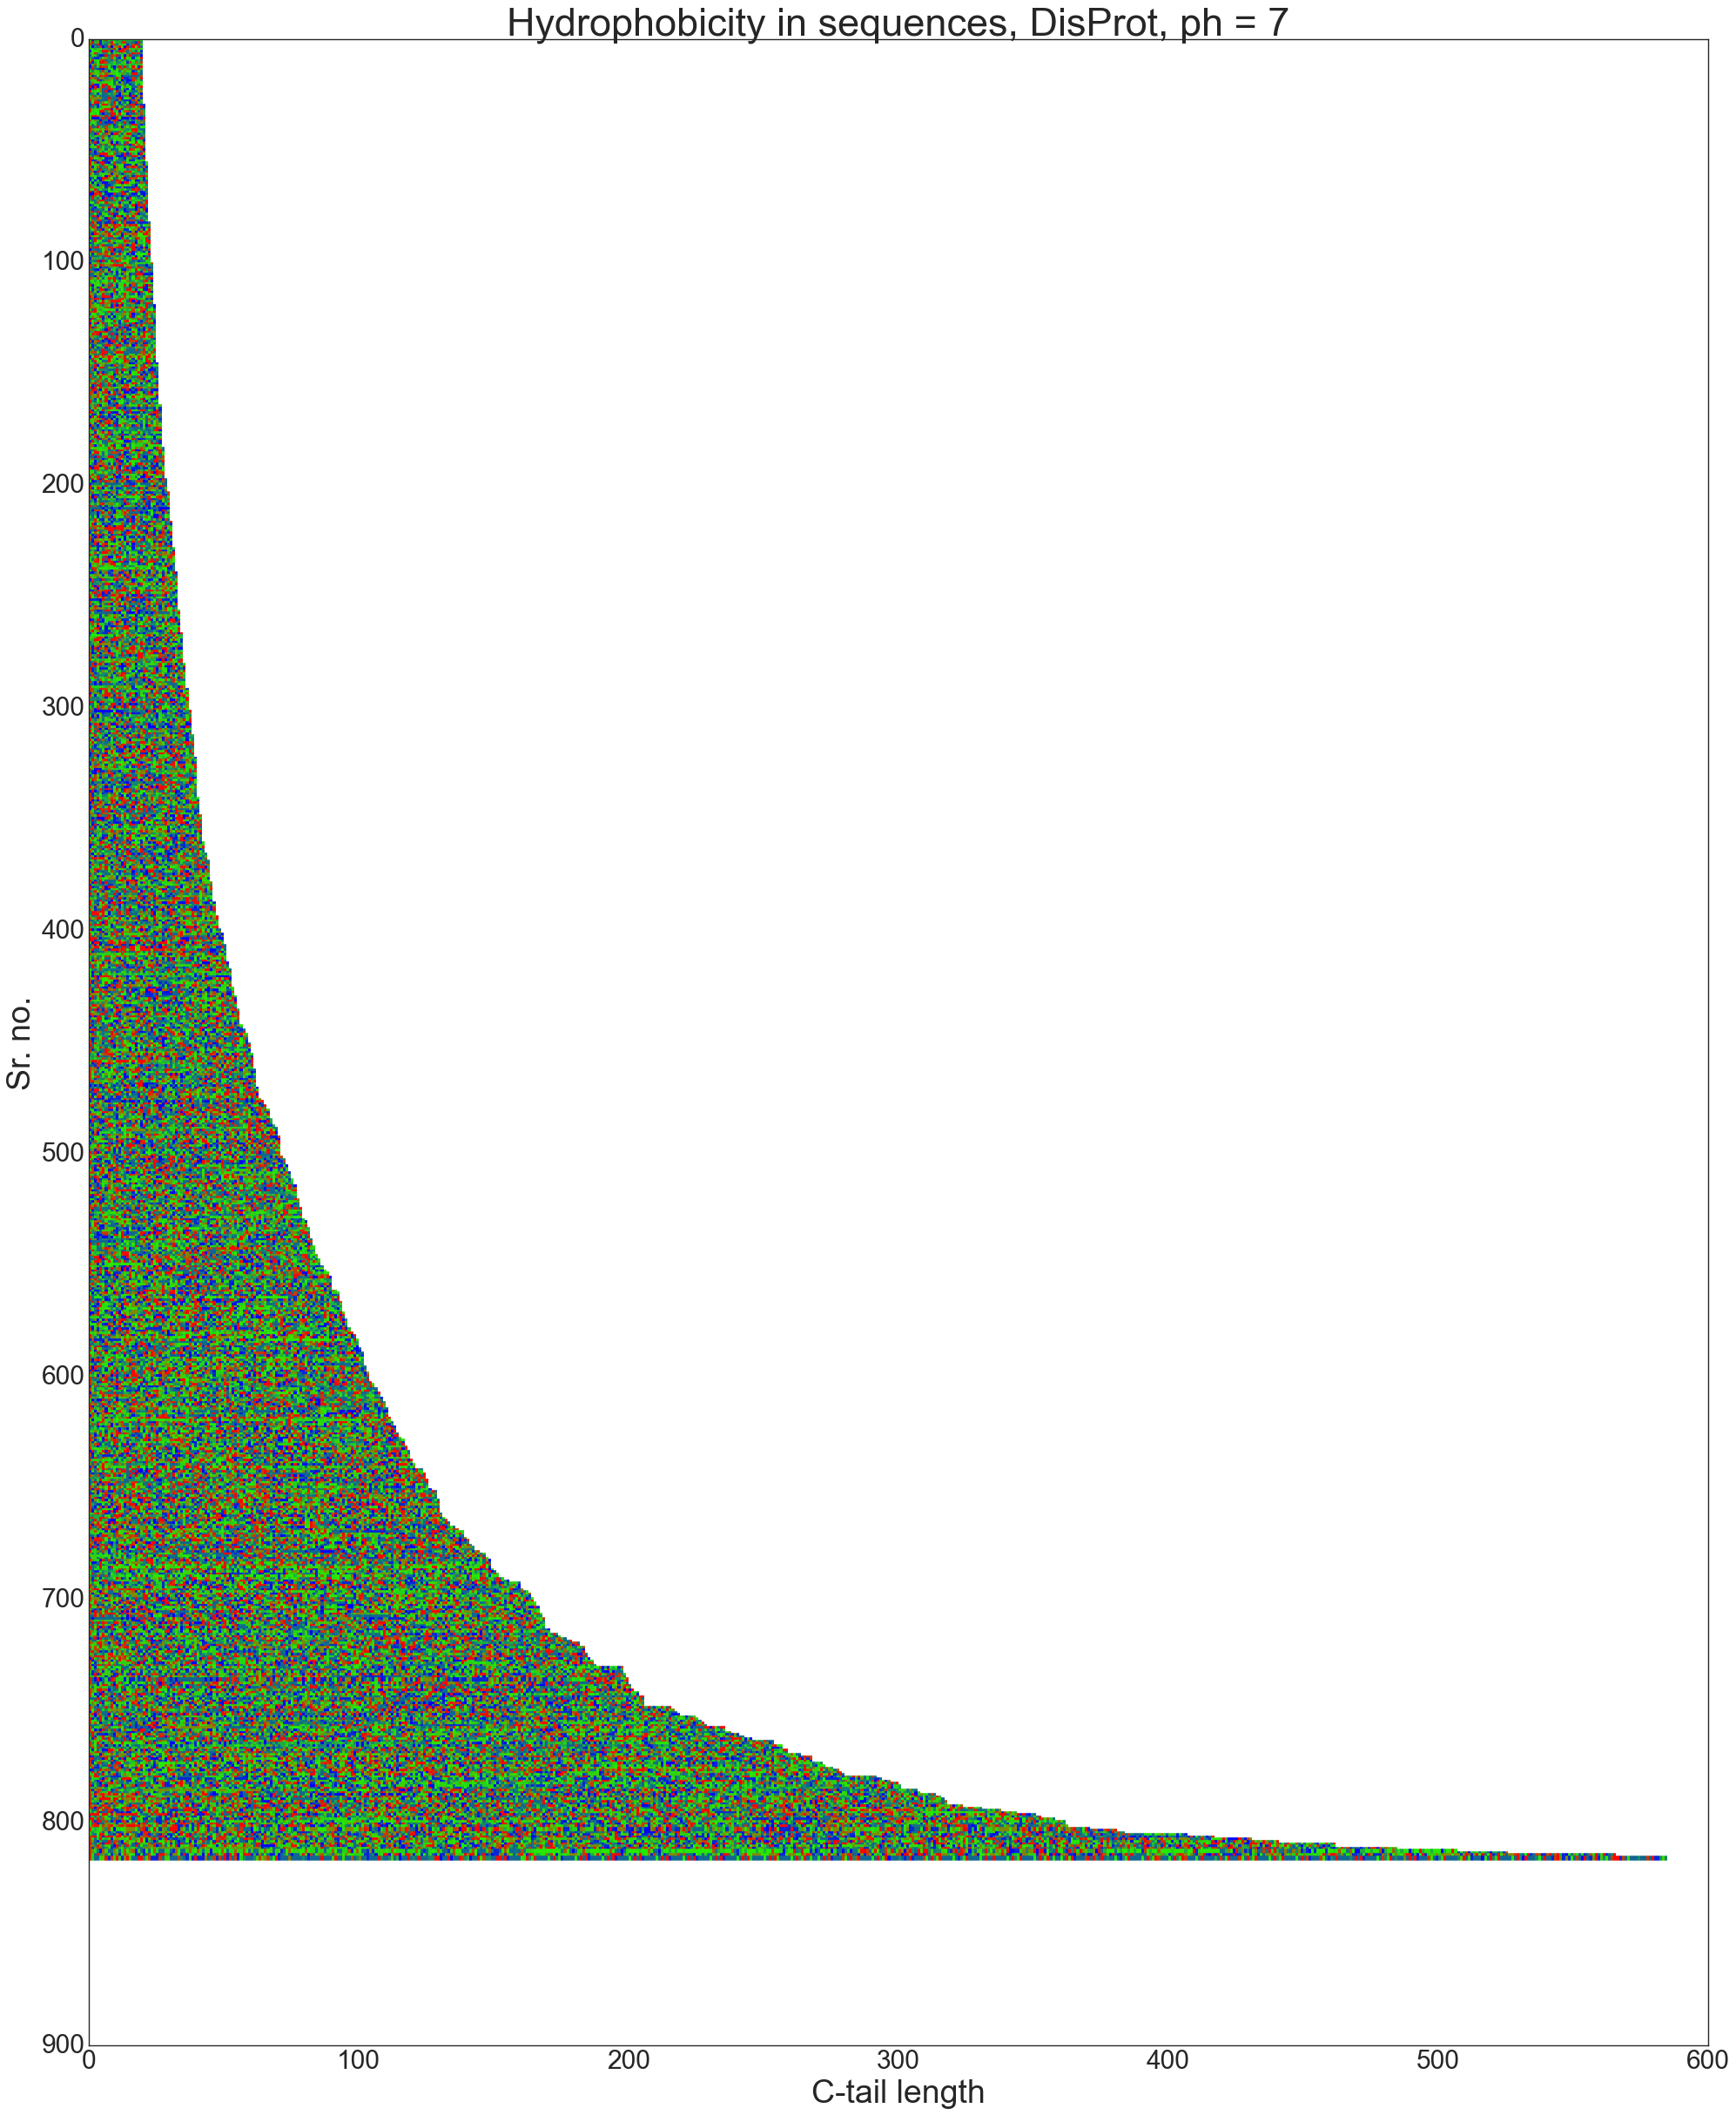

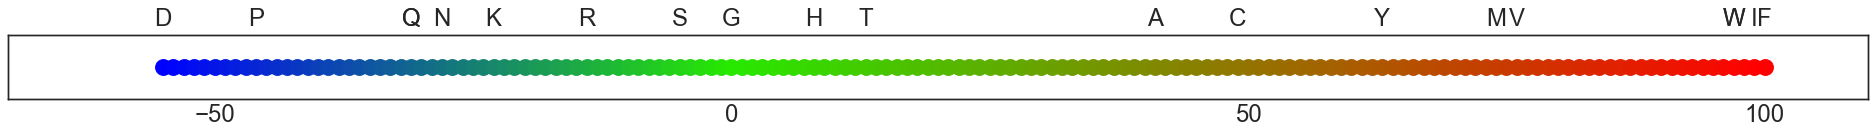

In [23]:
_ = gpcr.line_hydrophobicity_in_sequences( # sequences    = gpcr.DISPROT_DF[0:500]["seq"],
                                       df = gpcr.DISPROT_DF,
                                       hydrophobicity_aas = gpcr.AA.HYDRO_PHOBICITY_PH7,
                                       scale_factor = 0.45,
                                       figsize      = (30, 36),
                                       normalized   = False,
                                       # savefig      = True,
                                       title_add    = ", ph = 7"
                                     ) 

# <span style="color:red"> NEW </span>

In [24]:
match_score_df, optimal_match_ratio_overall_df = gpcr.get_match_score_cycle()

AttributeError: module 'gpcr_package' has no attribute 'get_match_score_cycle'

In [ ]:
match_score_df

In [ ]:
gpcr.GPCR_DF

# <span style="color:orange"> GPCR </span>

In [25]:
reduced_dataset_gpcr_df, removed_dataset_gpcr_df, optimal_match_ratios_overall_gpcr_df, gpcr_df = gpcr.reduce_dataset_based_on_match_ratio( 
                                                                                                df                  = gpcr.GPCR_DF,
                                                                                                sequences           = (),
                                                                                                limit_match_score   = 0.8,
                                                                                                show_details        = True
                                                                                             ) 

100% |########################################################################|


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
                    Matched sequences
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Seq 12    (aa_loc = 0    - 24  ) : SGKTLHSWRKFYTRLTNSRHGETTV
Seq 13    (aa_loc = 0    - 24  ) : SGKTLNSWRKFYTRLTNSKQGETTV
Match                            : 22
Mis-match                        : 3
Comparision length               : 25
Non comparision length           : 0
Comparision length match-ratio   : 0.8800000000     [ Comparision length match-ratio =  Match  /  Comparision length
Overall length match-ratio       : 0.8800000000     [ Overall length 

In [ ]:
print( len( gpcr_df ) )
print( len( reduced_dataset_gpcr_df ) )

In [ ]:
removed_dataset_gpcr_df

In [ ]:
gpcr_df

In [ ]:
reduced_dataset_gpcr_df

In [ ]:
_ = gpcr.line_hydrophobicity_in_sequences( df           = reduced_dataset_gpcr_df,
                                           scale_factor = 0.45,
                                           figsize      = (30, 36),
                                           # linewidth    = 5.5,
                                           normalized   = False,
                                           savefig      = False,
                                           dataset      = "GPCR",
                                           color_min    = color_min,  # blue
                                           color_zero   = color_zero, # green
                                           color_max    = color_max,  # red
                                           ylim                = (400, 0),
                                           threshold_len_min   = None,
                                           threshold_len_max   = None,
                                           title_add    = ", ph = 2 (Reduced dataset)"
                                         ) 

# <span style="color:orange"> DisProt </span>

In [ ]:
reduced_dataset_disprot_df, removed_dataset_disprot_df, optimal_match_ratios_overall_disprot_df, disprot_df = gpcr.reduce_dataset_based_on_match_ratio( 
                                                                                                df                  = gpcr.DISPROT_DF,
                                                                                                sequences           = (),
                                                                                                limit_match_score   = 0.9,
                                                                                                show_details        = True
                                                                                             )

In [ ]:
reduced_dataset_disprot_df.tail()

In [ ]:
removed_dataset_disprot_df

In [ ]:
print( len( disprot_df ) )
print( len( reduced_dataset_disprot_df ) )

In [ ]:
_ = gpcr.line_hydrophobicity_in_sequences( df           = reduced_dataset_disprot_df,
                                           scale_factor = 0.45,
                                           figsize      = (30, 36),
                                           normalized   = False,
                                           savefig      = False,
                                           dataset      = "DISPROT",
                                           title_add    = ", ph = 2 (Reduced dataset)"
                                         ) 

In [ ]:
seq_1 = reduced_dataset_disprot_df.loc[816, "seq"]
seq_2 = reduced_dataset_disprot_df.loc[817, "seq"]
match_score_cycle_df, optimal_match_ratio_overall_df = gpcr.get_match_score_cycle( seq_1 = seq_1,
                                                                                   seq_2 = seq_2,
                                                                                   show_details = True
                                                                                 )

In [ ]:
# match_score_cycle_df

In [ ]:
optimal_match_ratio_overall_df

In [27]:
gpcr.GPCR_DF[ gpcr.GPCR_DF["class"] == "F" ]

gene class  name  seq_len  \
29    FZD7     F  GPCR       25   
30    FZD2     F  GPCR       25   
31    FZD1     F  GPCR       25   
84    FZD4     F  GPCR       39   
203  FZD10     F  GPCR       58   
216   FZD9     F  GPCR       62   
225   FZD5     F  GPCR       64   
293   FZD8     F  GPCR       89   
334   FZD3     F  GPCR      168   
341   FZD6     F  GPCR      212   
343    SMO     F  GPCR      242   

                                                   seq  
29                           SGKTLQSWRRFYHRLSHSSKGETAV  
30                           SGKTLHSWRKFYTRLTNSRHGETTV  
31                           SGKTLNSWRKFYTRLTNSKQGETTV  
84             KTLHTWQKCSNRLVNSGKVKREKRGNGWVKPGKGSETVV  
203  TSKTLQSWQQVCSRRLKKKSRRKPASVITSGGIYKKAQHPQKTHHG...  
216  SSKTFQTWQSLCYRKIAAGRARAKACRAPGSYGRGTHCHYKAPTVV...  
225  WSGKTVESWRRFTSRCCCRPRRGHKSGGAMAAGDYPEASAALTGRT...  
293  SGKTLESWRSLCTRCCWASKGAAVGGGAGATAAGGGGGPGGGGGGG...  
334  GSKKTCFEWASFFHGRRKKEIVNESRQVLQEPDFAQSLLRDPNTPI...  
341  GSKKTCTEWAGFFKRNRKRDPISESRRVLQESCEFFLKHNSKVKHK...  
343  RRTWCRLTGQSDDEPKRIKKSKMIAKAFSKRHELLQNPGQELSFSM...